# DNN using Keras
<br><br>tested: 2020-11-10


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.polynomial.polynomial import polyfit
import matplotlib.style as style 
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

# define random jitter
def rjitt(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

# to set data path
dataPath = 'https://raw.githubusercontent.com/stillxyxon/py_ml_analysis/master/'

# YONG's local data path
# dataPath = 'C:/YONG/m1710/myPydata/'


def rjitt2(arr):
    stdev = .031*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

def rjitt3(arr):
    stdev = .1*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

# custom min max scaler
def mnmx_scl(vec):
    vec = (vec-vec.min())/(vec.max()-vec.min())
    return(vec)

def mnmx_scl2(vec):
    vec = np.where(np.percentile(vec, 95) < vec,
                   np.percentile(vec, 95), vec)
    vec = np.array(vec)
    vec = (vec-vec.min())/(vec.max()-vec.min())
    return(vec)

# custom one-hot encoder
def oneHotEncode(df,colNames):
    for col in colNames:
        if( df[col].dtype == np.dtype('object')):
            dummies = pd.get_dummies(df[col],prefix=col)
            df = pd.concat([df,dummies],axis=1)

            #drop the encoded column
            df.drop([col],axis = 1 , inplace=True)
    return df
    

# print('There were {} columns before encoding categorical features'.format(combined.shape[1]))
# combined = oneHotEncode(combined, cat_cols)


## DNN for Classication 

### 보험료 추정 예제

In [23]:
dfi01 = pd.read_csv(dataPath + 'insurance_charge.csv')
print(dfi01.columns)
print(dfi01.shape)

# check if any null
print('any null? ', dfi01.isnull().any())
dfi01.head()

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
(1338, 7)
any null?  age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [24]:
# include numeric variables only
dfi02 = dfi01[['age','sex','bmi','children','smoker','charges']]
dfi02.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [25]:
# transform binary categorical variables into numeric

dfi02['is_female'] = np.where(dfi02.sex=='female',1,0)
dfi02['is_smoker'] = np.where(dfi02.smoker=='yes',1,0)
dfi02 = dfi02[['age','is_female','bmi','children','is_smoker','charges']]
dfi02.head()

,age,is_female,bmi,children,is_smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520


   age  is_female    bmi  children  is_smoker
0   19          1  27.90         0          1
1   18          0  33.77         1          0
2   28          0  33.00         3          0


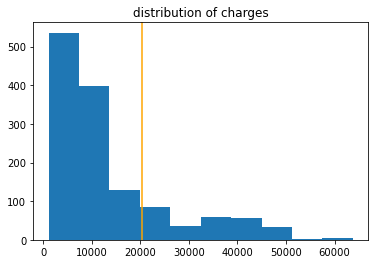

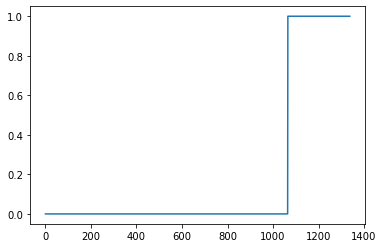

In [26]:
from sklearn.model_selection import train_test_split

# Specify the data 
X = dfi02.iloc[:,0:5]
print(X.head(3))

# 타겟인 charges의 분포를 살펴보고
plt.hist(dfi02.charges)
plt.axvline(np.percentile(dfi02.charges,80), color='orange')
plt.title('distribution of charges')
plt.plot()
plt.show()

# 상위 20% 가량에 해당하는 20000 이상을 
# high 그룹으로 지정해서 classification target으로 설정

bin_tgt = np.where(dfi02.charges>=20000, 1, 0)
plt.plot(np.sort(bin_tgt))
plt.show()

y = bin_tgt

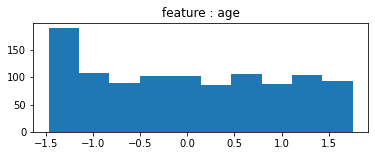

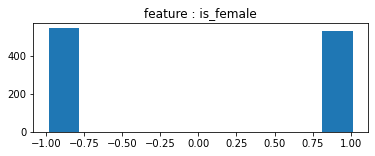

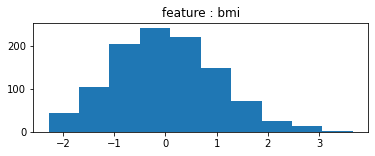

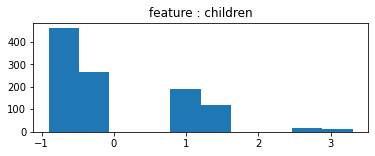

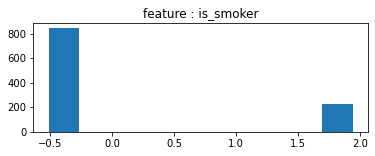

In [12]:
# [Partitioning]  한국말로는 .... 데이터 분할
# Split the data up in train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)


# [Scaling Inputs]

# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set based on train set distribution
X_train = scaler.transform(X_train)

# Scale the test set based on train set distribution
X_test = scaler.transform(X_test)

features_ = dfi02.iloc[:,0:5].columns
# check the dstributions after scaling
for x in range(len(features_)):
    plt.figure(figsize=(6,2))
    plt.hist(X_train[:,x])
    title = 'feature : ' + features_[x]
    plt.title(title)
    plt.show()
    


In [27]:
# import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(5, activation='sigmoid', input_shape=(5,)))

num_layers = 1 
nnode = 2

for _ in range(num_layers):
    # Add hidden layer   
    model.add(Dense(nnode,  activation='sigmoid')) # activation = ['sigmoid', 'relu']

# Add an output layer 
model.add(Dense(1,  activation='sigmoid'))
model.summary()



Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_16 (Dense)             (None, 2)                 12        
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 3         
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


In [18]:
import tensorflow as tf

In [32]:
# fitting (training) DNN

import datetime
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer='sgd', 
              metrics=['accuracy'])

start_time = datetime.datetime.now()
print('start : ', start_time )
history = model.fit(X_train, y_train, epochs=3000, batch_size=16,
                    verbose=1, validation_split=0.2)

end_time = datetime.datetime.now()
print('end : ', end_time )
print('runtime : ', end_time - start_time)
model.summary()

start :  2020-12-11 12:12:54.544452
Epoch 1/3000
54/54 [==============================] - 0s 8ms/step - loss: 0.2071 - accuracy: 0.9416 - val_loss: 0.2510 - val_accuracy: 0.9252
Epoch 2/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2071 - accuracy: 0.9416 - val_loss: 0.2510 - val_accuracy: 0.9252
Epoch 3/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2071 - accuracy: 0.9416 - val_loss: 0.2509 - val_accuracy: 0.9252
Epoch 4/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2071 - accuracy: 0.9416 - val_loss: 0.2509 - val_accuracy: 0.9252
Epoch 5/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2071 - accuracy: 0.9416 - val_loss: 0.2511 - val_accuracy: 0.9252
Epoch 6/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2071 - accuracy: 0.9416 - val_loss: 0.2510 - val_accuracy: 0.9252
Epoch 7/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2071 - accuracy: 0.9416 - val_loss: 

54/54 [==============================] - 0s 2ms/step - loss: 0.2066 - accuracy: 0.9416 - val_loss: 0.2506 - val_accuracy: 0.9252
Epoch 59/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2066 - accuracy: 0.9416 - val_loss: 0.2506 - val_accuracy: 0.9252
Epoch 60/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2066 - accuracy: 0.9416 - val_loss: 0.2506 - val_accuracy: 0.9252
Epoch 61/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2066 - accuracy: 0.9416 - val_loss: 0.2507 - val_accuracy: 0.9206
Epoch 62/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2065 - accuracy: 0.9416 - val_loss: 0.2507 - val_accuracy: 0.9206
Epoch 63/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2065 - accuracy: 0.9416 - val_loss: 0.2506 - val_accuracy: 0.9206
Epoch 64/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2065 - accuracy: 0.9416 - val_loss: 0.2507 - val_accuracy: 0.9206
Epoch 65/3000

54/54 [==============================] - 0s 2ms/step - loss: 0.2061 - accuracy: 0.9416 - val_loss: 0.2507 - val_accuracy: 0.9206
Epoch 116/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2061 - accuracy: 0.9416 - val_loss: 0.2506 - val_accuracy: 0.9206
Epoch 117/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2061 - accuracy: 0.9416 - val_loss: 0.2508 - val_accuracy: 0.9206
Epoch 118/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2061 - accuracy: 0.9416 - val_loss: 0.2508 - val_accuracy: 0.9206
Epoch 119/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2061 - accuracy: 0.9416 - val_loss: 0.2507 - val_accuracy: 0.9206
Epoch 120/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2061 - accuracy: 0.9416 - val_loss: 0.2507 - val_accuracy: 0.9206
Epoch 121/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2061 - accuracy: 0.9416 - val_loss: 0.2506 - val_accuracy: 0.9206
Epoch 1

Epoch 172/3000
54/54 [==============================] - 0s 1ms/step - loss: 0.2057 - accuracy: 0.9416 - val_loss: 0.2507 - val_accuracy: 0.9206
Epoch 173/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2057 - accuracy: 0.9416 - val_loss: 0.2507 - val_accuracy: 0.9206
Epoch 174/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2057 - accuracy: 0.9416 - val_loss: 0.2507 - val_accuracy: 0.9206
Epoch 175/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2057 - accuracy: 0.9416 - val_loss: 0.2507 - val_accuracy: 0.9206
Epoch 176/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2057 - accuracy: 0.9416 - val_loss: 0.2507 - val_accuracy: 0.9206
Epoch 177/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2057 - accuracy: 0.9416 - val_loss: 0.2507 - val_accuracy: 0.9206
Epoch 178/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2056 - accuracy: 0.9416 - val_loss: 0.2505 - val_accuracy:

Epoch 229/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2053 - accuracy: 0.9416 - val_loss: 0.2506 - val_accuracy: 0.9206
Epoch 230/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2053 - accuracy: 0.9416 - val_loss: 0.2506 - val_accuracy: 0.9206
Epoch 231/3000
54/54 [==============================] - 0s 1ms/step - loss: 0.2053 - accuracy: 0.9416 - val_loss: 0.2505 - val_accuracy: 0.9206
Epoch 232/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2053 - accuracy: 0.9416 - val_loss: 0.2506 - val_accuracy: 0.9206
Epoch 233/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2053 - accuracy: 0.9416 - val_loss: 0.2506 - val_accuracy: 0.9206
Epoch 234/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2053 - accuracy: 0.9416 - val_loss: 0.2506 - val_accuracy: 0.9206
Epoch 235/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2053 - accuracy: 0.9416 - val_loss: 0.2506 - val_accuracy:

Epoch 286/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2050 - accuracy: 0.9416 - val_loss: 0.2506 - val_accuracy: 0.9206
Epoch 287/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2050 - accuracy: 0.9416 - val_loss: 0.2506 - val_accuracy: 0.9206
Epoch 288/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2051 - accuracy: 0.9416 - val_loss: 0.2506 - val_accuracy: 0.9206
Epoch 289/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2050 - accuracy: 0.9416 - val_loss: 0.2506 - val_accuracy: 0.9206
Epoch 290/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2050 - accuracy: 0.9416 - val_loss: 0.2507 - val_accuracy: 0.9206
Epoch 291/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2050 - accuracy: 0.9416 - val_loss: 0.2507 - val_accuracy: 0.9206
Epoch 292/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2050 - accuracy: 0.9416 - val_loss: 0.2506 - val_accuracy:

Epoch 343/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2048 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 344/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2048 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 345/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2048 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 346/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2048 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 347/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2047 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 348/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2048 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 349/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2048 - accuracy: 0.9416 - val_loss: 0.2503 - val_accuracy:

Epoch 400/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2046 - accuracy: 0.9416 - val_loss: 0.2506 - val_accuracy: 0.9206
Epoch 401/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2046 - accuracy: 0.9416 - val_loss: 0.2507 - val_accuracy: 0.9206
Epoch 402/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2045 - accuracy: 0.9416 - val_loss: 0.2507 - val_accuracy: 0.9206
Epoch 403/3000
54/54 [==============================] - 0s 1ms/step - loss: 0.2045 - accuracy: 0.9416 - val_loss: 0.2507 - val_accuracy: 0.9206
Epoch 404/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2045 - accuracy: 0.9416 - val_loss: 0.2507 - val_accuracy: 0.9206
Epoch 405/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2045 - accuracy: 0.9416 - val_loss: 0.2507 - val_accuracy: 0.9206
Epoch 406/3000
54/54 [==============================] - 0s 1ms/step - loss: 0.2045 - accuracy: 0.9416 - val_loss: 0.2507 - val_accuracy:

54/54 [==============================] - 0s 2ms/step - loss: 0.2043 - accuracy: 0.9416 - val_loss: 0.2505 - val_accuracy: 0.9206
Epoch 457/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2043 - accuracy: 0.9416 - val_loss: 0.2505 - val_accuracy: 0.9206
Epoch 458/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2043 - accuracy: 0.9416 - val_loss: 0.2505 - val_accuracy: 0.9206
Epoch 459/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2043 - accuracy: 0.9416 - val_loss: 0.2505 - val_accuracy: 0.9206
Epoch 460/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2043 - accuracy: 0.9416 - val_loss: 0.2505 - val_accuracy: 0.9206
Epoch 461/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2043 - accuracy: 0.9416 - val_loss: 0.2505 - val_accuracy: 0.9206
Epoch 462/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2043 - accuracy: 0.9416 - val_loss: 0.2506 - val_accuracy: 0.9206
Epoch 4

Epoch 513/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2041 - accuracy: 0.9416 - val_loss: 0.2505 - val_accuracy: 0.9206
Epoch 514/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2042 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 515/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2041 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 516/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2041 - accuracy: 0.9416 - val_loss: 0.2503 - val_accuracy: 0.9206
Epoch 517/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2041 - accuracy: 0.9416 - val_loss: 0.2502 - val_accuracy: 0.9206
Epoch 518/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2041 - accuracy: 0.9416 - val_loss: 0.2503 - val_accuracy: 0.9206
Epoch 519/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2041 - accuracy: 0.9416 - val_loss: 0.2503 - val_accuracy:

54/54 [==============================] - 0s 2ms/step - loss: 0.2040 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 570/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2040 - accuracy: 0.9416 - val_loss: 0.2505 - val_accuracy: 0.9206
Epoch 571/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2040 - accuracy: 0.9416 - val_loss: 0.2505 - val_accuracy: 0.9206
Epoch 572/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2040 - accuracy: 0.9416 - val_loss: 0.2505 - val_accuracy: 0.9206
Epoch 573/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2040 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 574/3000
54/54 [==============================] - 0s 1ms/step - loss: 0.2040 - accuracy: 0.9416 - val_loss: 0.2505 - val_accuracy: 0.9206
Epoch 575/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2040 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 5

Epoch 626/3000
54/54 [==============================] - 0s 1ms/step - loss: 0.2038 - accuracy: 0.9416 - val_loss: 0.2505 - val_accuracy: 0.9206
Epoch 627/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2039 - accuracy: 0.9416 - val_loss: 0.2505 - val_accuracy: 0.9206
Epoch 628/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2039 - accuracy: 0.9416 - val_loss: 0.2505 - val_accuracy: 0.9206
Epoch 629/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2038 - accuracy: 0.9416 - val_loss: 0.2505 - val_accuracy: 0.9206
Epoch 630/3000
54/54 [==============================] - 0s 1ms/step - loss: 0.2038 - accuracy: 0.9416 - val_loss: 0.2505 - val_accuracy: 0.9206
Epoch 631/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2039 - accuracy: 0.9416 - val_loss: 0.2505 - val_accuracy: 0.9206
Epoch 632/3000
54/54 [==============================] - 0s 1ms/step - loss: 0.2038 - accuracy: 0.9416 - val_loss: 0.2505 - val_accuracy:

Epoch 683/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2037 - accuracy: 0.9404 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 684/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2037 - accuracy: 0.9416 - val_loss: 0.2503 - val_accuracy: 0.9206
Epoch 685/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2037 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 686/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2037 - accuracy: 0.9416 - val_loss: 0.2503 - val_accuracy: 0.9206
Epoch 687/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2037 - accuracy: 0.9416 - val_loss: 0.2503 - val_accuracy: 0.9206
Epoch 688/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2037 - accuracy: 0.9416 - val_loss: 0.2503 - val_accuracy: 0.9206
Epoch 689/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2037 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy:

Epoch 740/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2036 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 741/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2036 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 742/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2036 - accuracy: 0.9416 - val_loss: 0.2505 - val_accuracy: 0.9206
Epoch 743/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2036 - accuracy: 0.9416 - val_loss: 0.2505 - val_accuracy: 0.9206
Epoch 744/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2036 - accuracy: 0.9416 - val_loss: 0.2505 - val_accuracy: 0.9206
Epoch 745/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2036 - accuracy: 0.9416 - val_loss: 0.2505 - val_accuracy: 0.9206
Epoch 746/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2036 - accuracy: 0.9416 - val_loss: 0.2505 - val_accuracy:

Epoch 797/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2035 - accuracy: 0.9404 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 798/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2035 - accuracy: 0.9404 - val_loss: 0.2505 - val_accuracy: 0.9206
Epoch 799/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2035 - accuracy: 0.9416 - val_loss: 0.2505 - val_accuracy: 0.9206
Epoch 800/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2035 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 801/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2035 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 802/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2035 - accuracy: 0.9416 - val_loss: 0.2503 - val_accuracy: 0.9206
Epoch 803/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2035 - accuracy: 0.9404 - val_loss: 0.2504 - val_accuracy:

Epoch 854/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2034 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 855/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2034 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 856/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2034 - accuracy: 0.9404 - val_loss: 0.2505 - val_accuracy: 0.9206
Epoch 857/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2034 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 858/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2034 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 859/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2034 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 860/3000
54/54 [==============================] - 0s 1ms/step - loss: 0.2034 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy:

Epoch 911/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2033 - accuracy: 0.9416 - val_loss: 0.2503 - val_accuracy: 0.9206
Epoch 912/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2033 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 913/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2033 - accuracy: 0.9416 - val_loss: 0.2503 - val_accuracy: 0.9206
Epoch 914/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2033 - accuracy: 0.9416 - val_loss: 0.2502 - val_accuracy: 0.9206
Epoch 915/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2033 - accuracy: 0.9416 - val_loss: 0.2502 - val_accuracy: 0.9206
Epoch 916/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2033 - accuracy: 0.9416 - val_loss: 0.2502 - val_accuracy: 0.9206
Epoch 917/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2033 - accuracy: 0.9416 - val_loss: 0.2502 - val_accuracy:

54/54 [==============================] - 0s 2ms/step - loss: 0.2032 - accuracy: 0.9416 - val_loss: 0.2503 - val_accuracy: 0.9206
Epoch 968/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2032 - accuracy: 0.9416 - val_loss: 0.2503 - val_accuracy: 0.9206
Epoch 969/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2032 - accuracy: 0.9416 - val_loss: 0.2503 - val_accuracy: 0.9206
Epoch 970/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2032 - accuracy: 0.9416 - val_loss: 0.2503 - val_accuracy: 0.9206
Epoch 971/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2032 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 972/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2032 - accuracy: 0.9416 - val_loss: 0.2503 - val_accuracy: 0.9206
Epoch 973/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2032 - accuracy: 0.9404 - val_loss: 0.2503 - val_accuracy: 0.9206
Epoch 9

Epoch 1024/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2032 - accuracy: 0.9416 - val_loss: 0.2506 - val_accuracy: 0.9206
Epoch 1025/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2032 - accuracy: 0.9416 - val_loss: 0.2505 - val_accuracy: 0.9206
Epoch 1026/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2031 - accuracy: 0.9416 - val_loss: 0.2505 - val_accuracy: 0.9206
Epoch 1027/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2032 - accuracy: 0.9416 - val_loss: 0.2507 - val_accuracy: 0.9206
Epoch 1028/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2032 - accuracy: 0.9416 - val_loss: 0.2505 - val_accuracy: 0.9206
Epoch 1029/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2032 - accuracy: 0.9416 - val_loss: 0.2505 - val_accuracy: 0.9206
Epoch 1030/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2032 - accuracy: 0.9416 - val_loss: 0.2505 - val_ac

54/54 [==============================] - 0s 2ms/step - loss: 0.2031 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 1081/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2031 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 1082/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2031 - accuracy: 0.9404 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 1083/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2031 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 1084/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2031 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 1085/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2031 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 1086/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2031 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy: 0.9206
E

54/54 [==============================] - 0s 2ms/step - loss: 0.2030 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 1137/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2030 - accuracy: 0.9416 - val_loss: 0.2503 - val_accuracy: 0.9206
Epoch 1138/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2030 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 1139/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2030 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 1140/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2030 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 1141/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2030 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 1142/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2030 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy: 0.9206
E

54/54 [==============================] - 0s 2ms/step - loss: 0.2029 - accuracy: 0.9416 - val_loss: 0.2503 - val_accuracy: 0.9206
Epoch 1193/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2030 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 1194/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2030 - accuracy: 0.9416 - val_loss: 0.2503 - val_accuracy: 0.9206
Epoch 1195/3000
54/54 [==============================] - 0s 1ms/step - loss: 0.2030 - accuracy: 0.9416 - val_loss: 0.2503 - val_accuracy: 0.9206
Epoch 1196/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2030 - accuracy: 0.9404 - val_loss: 0.2503 - val_accuracy: 0.9206
Epoch 1197/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2030 - accuracy: 0.9416 - val_loss: 0.2503 - val_accuracy: 0.9206
Epoch 1198/3000
54/54 [==============================] - 0s 1ms/step - loss: 0.2030 - accuracy: 0.9416 - val_loss: 0.2503 - val_accuracy: 0.9206
E

54/54 [==============================] - 0s 2ms/step - loss: 0.2029 - accuracy: 0.9416 - val_loss: 0.2505 - val_accuracy: 0.9206
Epoch 1249/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2029 - accuracy: 0.9404 - val_loss: 0.2505 - val_accuracy: 0.9206
Epoch 1250/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2029 - accuracy: 0.9416 - val_loss: 0.2505 - val_accuracy: 0.9206
Epoch 1251/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2029 - accuracy: 0.9416 - val_loss: 0.2505 - val_accuracy: 0.9206
Epoch 1252/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2029 - accuracy: 0.9416 - val_loss: 0.2505 - val_accuracy: 0.9206
Epoch 1253/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2029 - accuracy: 0.9416 - val_loss: 0.2505 - val_accuracy: 0.9206
Epoch 1254/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2029 - accuracy: 0.9416 - val_loss: 0.2505 - val_accuracy: 0.9206
E

54/54 [==============================] - 0s 2ms/step - loss: 0.2029 - accuracy: 0.9416 - val_loss: 0.2505 - val_accuracy: 0.9206
Epoch 1305/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2029 - accuracy: 0.9416 - val_loss: 0.2505 - val_accuracy: 0.9206
Epoch 1306/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2028 - accuracy: 0.9416 - val_loss: 0.2505 - val_accuracy: 0.9206
Epoch 1307/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2029 - accuracy: 0.9416 - val_loss: 0.2506 - val_accuracy: 0.9206
Epoch 1308/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2028 - accuracy: 0.9416 - val_loss: 0.2506 - val_accuracy: 0.9206
Epoch 1309/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2028 - accuracy: 0.9416 - val_loss: 0.2506 - val_accuracy: 0.9206
Epoch 1310/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2029 - accuracy: 0.9416 - val_loss: 0.2506 - val_accuracy: 0.9206
E

54/54 [==============================] - 0s 2ms/step - loss: 0.2028 - accuracy: 0.9416 - val_loss: 0.2503 - val_accuracy: 0.9206
Epoch 1361/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2028 - accuracy: 0.9416 - val_loss: 0.2503 - val_accuracy: 0.9206
Epoch 1362/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2028 - accuracy: 0.9404 - val_loss: 0.2503 - val_accuracy: 0.9206
Epoch 1363/3000
54/54 [==============================] - 0s 1ms/step - loss: 0.2028 - accuracy: 0.9416 - val_loss: 0.2502 - val_accuracy: 0.9206
Epoch 1364/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2028 - accuracy: 0.9404 - val_loss: 0.2503 - val_accuracy: 0.9206
Epoch 1365/3000
54/54 [==============================] - 0s 1ms/step - loss: 0.2028 - accuracy: 0.9404 - val_loss: 0.2503 - val_accuracy: 0.9206
Epoch 1366/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2028 - accuracy: 0.9404 - val_loss: 0.2503 - val_accuracy: 0.9206
E

54/54 [==============================] - 0s 2ms/step - loss: 0.2028 - accuracy: 0.9416 - val_loss: 0.2501 - val_accuracy: 0.9206
Epoch 1417/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2028 - accuracy: 0.9416 - val_loss: 0.2502 - val_accuracy: 0.9206
Epoch 1418/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2027 - accuracy: 0.9416 - val_loss: 0.2502 - val_accuracy: 0.9206
Epoch 1419/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2027 - accuracy: 0.9416 - val_loss: 0.2502 - val_accuracy: 0.9206
Epoch 1420/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2027 - accuracy: 0.9416 - val_loss: 0.2502 - val_accuracy: 0.9206
Epoch 1421/3000
54/54 [==============================] - 0s 1ms/step - loss: 0.2027 - accuracy: 0.9416 - val_loss: 0.2502 - val_accuracy: 0.9206
Epoch 1422/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2028 - accuracy: 0.9404 - val_loss: 0.2502 - val_accuracy: 0.9206
E

54/54 [==============================] - 0s 2ms/step - loss: 0.2027 - accuracy: 0.9416 - val_loss: 0.2503 - val_accuracy: 0.9206
Epoch 1473/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2027 - accuracy: 0.9416 - val_loss: 0.2503 - val_accuracy: 0.9206
Epoch 1474/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2027 - accuracy: 0.9416 - val_loss: 0.2503 - val_accuracy: 0.9206
Epoch 1475/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2027 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 1476/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2027 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 1477/3000
54/54 [==============================] - 0s 1ms/step - loss: 0.2027 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 1478/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2027 - accuracy: 0.9416 - val_loss: 0.2503 - val_accuracy: 0.9206
E

54/54 [==============================] - 0s 2ms/step - loss: 0.2027 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 1529/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2026 - accuracy: 0.9404 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 1530/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2027 - accuracy: 0.9404 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 1531/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2026 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 1532/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2026 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 1533/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2027 - accuracy: 0.9404 - val_loss: 0.2503 - val_accuracy: 0.9206
Epoch 1534/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2026 - accuracy: 0.9416 - val_loss: 0.2503 - val_accuracy: 0.9206
E

54/54 [==============================] - 0s 2ms/step - loss: 0.2026 - accuracy: 0.9416 - val_loss: 0.2502 - val_accuracy: 0.9206
Epoch 1585/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2026 - accuracy: 0.9416 - val_loss: 0.2502 - val_accuracy: 0.9206
Epoch 1586/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2026 - accuracy: 0.9404 - val_loss: 0.2502 - val_accuracy: 0.9206
Epoch 1587/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2026 - accuracy: 0.9416 - val_loss: 0.2503 - val_accuracy: 0.9206
Epoch 1588/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2026 - accuracy: 0.9416 - val_loss: 0.2502 - val_accuracy: 0.9206
Epoch 1589/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2026 - accuracy: 0.9404 - val_loss: 0.2501 - val_accuracy: 0.9206
Epoch 1590/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2026 - accuracy: 0.9404 - val_loss: 0.2502 - val_accuracy: 0.9206
E

54/54 [==============================] - 0s 2ms/step - loss: 0.2025 - accuracy: 0.9416 - val_loss: 0.2501 - val_accuracy: 0.9206
Epoch 1641/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2026 - accuracy: 0.9404 - val_loss: 0.2502 - val_accuracy: 0.9206
Epoch 1642/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2026 - accuracy: 0.9404 - val_loss: 0.2501 - val_accuracy: 0.9206
Epoch 1643/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2026 - accuracy: 0.9404 - val_loss: 0.2502 - val_accuracy: 0.9206
Epoch 1644/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2025 - accuracy: 0.9404 - val_loss: 0.2502 - val_accuracy: 0.9206
Epoch 1645/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2025 - accuracy: 0.9416 - val_loss: 0.2502 - val_accuracy: 0.9206
Epoch 1646/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2025 - accuracy: 0.9404 - val_loss: 0.2502 - val_accuracy: 0.9206
E

54/54 [==============================] - 0s 2ms/step - loss: 0.2025 - accuracy: 0.9404 - val_loss: 0.2501 - val_accuracy: 0.9206
Epoch 1697/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2025 - accuracy: 0.9404 - val_loss: 0.2501 - val_accuracy: 0.9206
Epoch 1698/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2025 - accuracy: 0.9404 - val_loss: 0.2501 - val_accuracy: 0.9206
Epoch 1699/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2025 - accuracy: 0.9404 - val_loss: 0.2501 - val_accuracy: 0.9206
Epoch 1700/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2025 - accuracy: 0.9404 - val_loss: 0.2503 - val_accuracy: 0.9206
Epoch 1701/3000
54/54 [==============================] - 0s 1ms/step - loss: 0.2025 - accuracy: 0.9416 - val_loss: 0.2503 - val_accuracy: 0.9206
Epoch 1702/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2025 - accuracy: 0.9416 - val_loss: 0.2502 - val_accuracy: 0.9206
E

54/54 [==============================] - 0s 2ms/step - loss: 0.2025 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 1753/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2025 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 1754/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2025 - accuracy: 0.9404 - val_loss: 0.2503 - val_accuracy: 0.9206
Epoch 1755/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2025 - accuracy: 0.9416 - val_loss: 0.2503 - val_accuracy: 0.9206
Epoch 1756/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2024 - accuracy: 0.9416 - val_loss: 0.2502 - val_accuracy: 0.9206
Epoch 1757/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2024 - accuracy: 0.9404 - val_loss: 0.2502 - val_accuracy: 0.9206
Epoch 1758/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2025 - accuracy: 0.9404 - val_loss: 0.2502 - val_accuracy: 0.9206
E

54/54 [==============================] - 0s 2ms/step - loss: 0.2024 - accuracy: 0.9416 - val_loss: 0.2505 - val_accuracy: 0.9206
Epoch 1809/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2024 - accuracy: 0.9416 - val_loss: 0.2505 - val_accuracy: 0.9206
Epoch 1810/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2024 - accuracy: 0.9416 - val_loss: 0.2505 - val_accuracy: 0.9206
Epoch 1811/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2024 - accuracy: 0.9404 - val_loss: 0.2506 - val_accuracy: 0.9206
Epoch 1812/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2024 - accuracy: 0.9416 - val_loss: 0.2505 - val_accuracy: 0.9206
Epoch 1813/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2024 - accuracy: 0.9416 - val_loss: 0.2504 - val_accuracy: 0.9206
Epoch 1814/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2024 - accuracy: 0.9404 - val_loss: 0.2504 - val_accuracy: 0.9206
E

54/54 [==============================] - 0s 2ms/step - loss: 0.2024 - accuracy: 0.9404 - val_loss: 0.2500 - val_accuracy: 0.9206
Epoch 1865/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2023 - accuracy: 0.9404 - val_loss: 0.2500 - val_accuracy: 0.9206
Epoch 1866/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2024 - accuracy: 0.9404 - val_loss: 0.2500 - val_accuracy: 0.9206
Epoch 1867/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2024 - accuracy: 0.9404 - val_loss: 0.2500 - val_accuracy: 0.9206
Epoch 1868/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2024 - accuracy: 0.9404 - val_loss: 0.2501 - val_accuracy: 0.9206
Epoch 1869/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2023 - accuracy: 0.9404 - val_loss: 0.2502 - val_accuracy: 0.9206
Epoch 1870/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2023 - accuracy: 0.9404 - val_loss: 0.2502 - val_accuracy: 0.9206
E

54/54 [==============================] - 0s 2ms/step - loss: 0.2023 - accuracy: 0.9404 - val_loss: 0.2501 - val_accuracy: 0.9206
Epoch 1921/3000
54/54 [==============================] - 0s 1ms/step - loss: 0.2023 - accuracy: 0.9404 - val_loss: 0.2501 - val_accuracy: 0.9206
Epoch 1922/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2023 - accuracy: 0.9404 - val_loss: 0.2501 - val_accuracy: 0.9206
Epoch 1923/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2023 - accuracy: 0.9404 - val_loss: 0.2500 - val_accuracy: 0.9206
Epoch 1924/3000
54/54 [==============================] - 0s 1ms/step - loss: 0.2023 - accuracy: 0.9404 - val_loss: 0.2500 - val_accuracy: 0.9206
Epoch 1925/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2023 - accuracy: 0.9404 - val_loss: 0.2500 - val_accuracy: 0.9206
Epoch 1926/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2023 - accuracy: 0.9404 - val_loss: 0.2500 - val_accuracy: 0.9206
E

54/54 [==============================] - 0s 2ms/step - loss: 0.2023 - accuracy: 0.9404 - val_loss: 0.2500 - val_accuracy: 0.9206
Epoch 1977/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2023 - accuracy: 0.9404 - val_loss: 0.2500 - val_accuracy: 0.9206
Epoch 1978/3000
54/54 [==============================] - 0s 1ms/step - loss: 0.2023 - accuracy: 0.9404 - val_loss: 0.2499 - val_accuracy: 0.9206
Epoch 1979/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2023 - accuracy: 0.9404 - val_loss: 0.2500 - val_accuracy: 0.9206
Epoch 1980/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2022 - accuracy: 0.9404 - val_loss: 0.2500 - val_accuracy: 0.9206
Epoch 1981/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2022 - accuracy: 0.9404 - val_loss: 0.2501 - val_accuracy: 0.9206
Epoch 1982/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2023 - accuracy: 0.9404 - val_loss: 0.2500 - val_accuracy: 0.9206
E

54/54 [==============================] - 0s 2ms/step - loss: 0.2022 - accuracy: 0.9416 - val_loss: 0.2503 - val_accuracy: 0.9206
Epoch 2033/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2022 - accuracy: 0.9404 - val_loss: 0.2502 - val_accuracy: 0.9206
Epoch 2034/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2022 - accuracy: 0.9404 - val_loss: 0.2502 - val_accuracy: 0.9206
Epoch 2035/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2022 - accuracy: 0.9404 - val_loss: 0.2502 - val_accuracy: 0.9206
Epoch 2036/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2022 - accuracy: 0.9404 - val_loss: 0.2502 - val_accuracy: 0.9206
Epoch 2037/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2022 - accuracy: 0.9404 - val_loss: 0.2502 - val_accuracy: 0.9206
Epoch 2038/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2022 - accuracy: 0.9404 - val_loss: 0.2501 - val_accuracy: 0.9206
E

54/54 [==============================] - 0s 2ms/step - loss: 0.2022 - accuracy: 0.9404 - val_loss: 0.2500 - val_accuracy: 0.9206
Epoch 2089/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2021 - accuracy: 0.9404 - val_loss: 0.2500 - val_accuracy: 0.9206
Epoch 2090/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2022 - accuracy: 0.9404 - val_loss: 0.2499 - val_accuracy: 0.9206
Epoch 2091/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2021 - accuracy: 0.9404 - val_loss: 0.2499 - val_accuracy: 0.9206
Epoch 2092/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2022 - accuracy: 0.9404 - val_loss: 0.2499 - val_accuracy: 0.9206
Epoch 2093/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2022 - accuracy: 0.9404 - val_loss: 0.2499 - val_accuracy: 0.9206
Epoch 2094/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2022 - accuracy: 0.9404 - val_loss: 0.2499 - val_accuracy: 0.9206
E

54/54 [==============================] - 0s 2ms/step - loss: 0.2021 - accuracy: 0.9404 - val_loss: 0.2501 - val_accuracy: 0.9206
Epoch 2145/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2021 - accuracy: 0.9404 - val_loss: 0.2501 - val_accuracy: 0.9206
Epoch 2146/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2021 - accuracy: 0.9404 - val_loss: 0.2501 - val_accuracy: 0.9206
Epoch 2147/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2021 - accuracy: 0.9404 - val_loss: 0.2501 - val_accuracy: 0.9206
Epoch 2148/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2021 - accuracy: 0.9404 - val_loss: 0.2501 - val_accuracy: 0.9206
Epoch 2149/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2021 - accuracy: 0.9404 - val_loss: 0.2501 - val_accuracy: 0.9206
Epoch 2150/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2021 - accuracy: 0.9404 - val_loss: 0.2501 - val_accuracy: 0.9206
E

54/54 [==============================] - 0s 2ms/step - loss: 0.2021 - accuracy: 0.9404 - val_loss: 0.2501 - val_accuracy: 0.9206
Epoch 2201/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2020 - accuracy: 0.9404 - val_loss: 0.2502 - val_accuracy: 0.9206
Epoch 2202/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2021 - accuracy: 0.9404 - val_loss: 0.2502 - val_accuracy: 0.9206
Epoch 2203/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2021 - accuracy: 0.9404 - val_loss: 0.2502 - val_accuracy: 0.9206
Epoch 2204/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2020 - accuracy: 0.9404 - val_loss: 0.2502 - val_accuracy: 0.9206
Epoch 2205/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2020 - accuracy: 0.9404 - val_loss: 0.2502 - val_accuracy: 0.9206
Epoch 2206/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2021 - accuracy: 0.9404 - val_loss: 0.2502 - val_accuracy: 0.9206
E

54/54 [==============================] - 0s 2ms/step - loss: 0.2020 - accuracy: 0.9404 - val_loss: 0.2500 - val_accuracy: 0.9206
Epoch 2257/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2020 - accuracy: 0.9404 - val_loss: 0.2499 - val_accuracy: 0.9206
Epoch 2258/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2020 - accuracy: 0.9404 - val_loss: 0.2500 - val_accuracy: 0.9206
Epoch 2259/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2020 - accuracy: 0.9404 - val_loss: 0.2500 - val_accuracy: 0.9206
Epoch 2260/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2020 - accuracy: 0.9404 - val_loss: 0.2500 - val_accuracy: 0.9206
Epoch 2261/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2020 - accuracy: 0.9404 - val_loss: 0.2499 - val_accuracy: 0.9206
Epoch 2262/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2020 - accuracy: 0.9404 - val_loss: 0.2500 - val_accuracy: 0.9206
E

54/54 [==============================] - 0s 2ms/step - loss: 0.2019 - accuracy: 0.9404 - val_loss: 0.2499 - val_accuracy: 0.9206
Epoch 2313/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2020 - accuracy: 0.9404 - val_loss: 0.2500 - val_accuracy: 0.9206
Epoch 2314/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2020 - accuracy: 0.9404 - val_loss: 0.2500 - val_accuracy: 0.9206
Epoch 2315/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2020 - accuracy: 0.9404 - val_loss: 0.2500 - val_accuracy: 0.9206
Epoch 2316/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2019 - accuracy: 0.9404 - val_loss: 0.2499 - val_accuracy: 0.9206
Epoch 2317/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2020 - accuracy: 0.9404 - val_loss: 0.2499 - val_accuracy: 0.9206
Epoch 2318/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2019 - accuracy: 0.9404 - val_loss: 0.2499 - val_accuracy: 0.9206
E

54/54 [==============================] - 0s 2ms/step - loss: 0.2019 - accuracy: 0.9404 - val_loss: 0.2497 - val_accuracy: 0.9206
Epoch 2369/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2019 - accuracy: 0.9404 - val_loss: 0.2496 - val_accuracy: 0.9206
Epoch 2370/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2019 - accuracy: 0.9404 - val_loss: 0.2496 - val_accuracy: 0.9206
Epoch 2371/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2019 - accuracy: 0.9404 - val_loss: 0.2496 - val_accuracy: 0.9206
Epoch 2372/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2019 - accuracy: 0.9404 - val_loss: 0.2497 - val_accuracy: 0.9206
Epoch 2373/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2019 - accuracy: 0.9404 - val_loss: 0.2497 - val_accuracy: 0.9206
Epoch 2374/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2019 - accuracy: 0.9404 - val_loss: 0.2497 - val_accuracy: 0.9206
E

54/54 [==============================] - 0s 2ms/step - loss: 0.2018 - accuracy: 0.9404 - val_loss: 0.2495 - val_accuracy: 0.9206
Epoch 2425/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2019 - accuracy: 0.9404 - val_loss: 0.2496 - val_accuracy: 0.9206
Epoch 2426/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2019 - accuracy: 0.9404 - val_loss: 0.2496 - val_accuracy: 0.9206
Epoch 2427/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2018 - accuracy: 0.9404 - val_loss: 0.2496 - val_accuracy: 0.9206
Epoch 2428/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2019 - accuracy: 0.9404 - val_loss: 0.2496 - val_accuracy: 0.9206
Epoch 2429/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2018 - accuracy: 0.9404 - val_loss: 0.2496 - val_accuracy: 0.9206
Epoch 2430/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2019 - accuracy: 0.9404 - val_loss: 0.2496 - val_accuracy: 0.9206
E

54/54 [==============================] - 0s 2ms/step - loss: 0.2018 - accuracy: 0.9404 - val_loss: 0.2497 - val_accuracy: 0.9206
Epoch 2481/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2018 - accuracy: 0.9404 - val_loss: 0.2497 - val_accuracy: 0.9206
Epoch 2482/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2018 - accuracy: 0.9404 - val_loss: 0.2496 - val_accuracy: 0.9206
Epoch 2483/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2018 - accuracy: 0.9404 - val_loss: 0.2496 - val_accuracy: 0.9206
Epoch 2484/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2018 - accuracy: 0.9404 - val_loss: 0.2496 - val_accuracy: 0.9206
Epoch 2485/3000
54/54 [==============================] - 0s 1ms/step - loss: 0.2018 - accuracy: 0.9404 - val_loss: 0.2496 - val_accuracy: 0.9206
Epoch 2486/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2018 - accuracy: 0.9404 - val_loss: 0.2496 - val_accuracy: 0.9206
E

54/54 [==============================] - 0s 2ms/step - loss: 0.2017 - accuracy: 0.9404 - val_loss: 0.2495 - val_accuracy: 0.9206
Epoch 2537/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2017 - accuracy: 0.9404 - val_loss: 0.2495 - val_accuracy: 0.9206
Epoch 2538/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2017 - accuracy: 0.9404 - val_loss: 0.2496 - val_accuracy: 0.9206
Epoch 2539/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2017 - accuracy: 0.9404 - val_loss: 0.2496 - val_accuracy: 0.9206
Epoch 2540/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2017 - accuracy: 0.9404 - val_loss: 0.2496 - val_accuracy: 0.9206
Epoch 2541/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2017 - accuracy: 0.9404 - val_loss: 0.2496 - val_accuracy: 0.9206
Epoch 2542/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2017 - accuracy: 0.9404 - val_loss: 0.2496 - val_accuracy: 0.9206
E

54/54 [==============================] - 0s 2ms/step - loss: 0.2017 - accuracy: 0.9404 - val_loss: 0.2495 - val_accuracy: 0.9206
Epoch 2593/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2017 - accuracy: 0.9404 - val_loss: 0.2494 - val_accuracy: 0.9206
Epoch 2594/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2017 - accuracy: 0.9404 - val_loss: 0.2494 - val_accuracy: 0.9206
Epoch 2595/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2017 - accuracy: 0.9404 - val_loss: 0.2494 - val_accuracy: 0.9206
Epoch 2596/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2017 - accuracy: 0.9404 - val_loss: 0.2496 - val_accuracy: 0.9206
Epoch 2597/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2017 - accuracy: 0.9404 - val_loss: 0.2497 - val_accuracy: 0.9206
Epoch 2598/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2017 - accuracy: 0.9404 - val_loss: 0.2497 - val_accuracy: 0.9206
E

54/54 [==============================] - 0s 2ms/step - loss: 0.2016 - accuracy: 0.9404 - val_loss: 0.2493 - val_accuracy: 0.9206
Epoch 2649/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2016 - accuracy: 0.9404 - val_loss: 0.2492 - val_accuracy: 0.9206
Epoch 2650/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2016 - accuracy: 0.9404 - val_loss: 0.2493 - val_accuracy: 0.9206
Epoch 2651/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2016 - accuracy: 0.9404 - val_loss: 0.2492 - val_accuracy: 0.9206
Epoch 2652/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2016 - accuracy: 0.9404 - val_loss: 0.2492 - val_accuracy: 0.9206
Epoch 2653/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2016 - accuracy: 0.9404 - val_loss: 0.2494 - val_accuracy: 0.9206
Epoch 2654/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2016 - accuracy: 0.9404 - val_loss: 0.2494 - val_accuracy: 0.9206
E

54/54 [==============================] - 0s 2ms/step - loss: 0.2016 - accuracy: 0.9404 - val_loss: 0.2493 - val_accuracy: 0.9206
Epoch 2705/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2016 - accuracy: 0.9404 - val_loss: 0.2493 - val_accuracy: 0.9206
Epoch 2706/3000
54/54 [==============================] - 0s 1ms/step - loss: 0.2016 - accuracy: 0.9404 - val_loss: 0.2492 - val_accuracy: 0.9206
Epoch 2707/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2016 - accuracy: 0.9404 - val_loss: 0.2492 - val_accuracy: 0.9206
Epoch 2708/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2016 - accuracy: 0.9404 - val_loss: 0.2492 - val_accuracy: 0.9206
Epoch 2709/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2016 - accuracy: 0.9404 - val_loss: 0.2492 - val_accuracy: 0.9206
Epoch 2710/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2016 - accuracy: 0.9404 - val_loss: 0.2492 - val_accuracy: 0.9206
E

54/54 [==============================] - 0s 2ms/step - loss: 0.2015 - accuracy: 0.9404 - val_loss: 0.2491 - val_accuracy: 0.9206
Epoch 2761/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2015 - accuracy: 0.9404 - val_loss: 0.2492 - val_accuracy: 0.9206
Epoch 2762/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2015 - accuracy: 0.9404 - val_loss: 0.2490 - val_accuracy: 0.9206
Epoch 2763/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2015 - accuracy: 0.9404 - val_loss: 0.2491 - val_accuracy: 0.9206
Epoch 2764/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2015 - accuracy: 0.9404 - val_loss: 0.2491 - val_accuracy: 0.9206
Epoch 2765/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2015 - accuracy: 0.9404 - val_loss: 0.2491 - val_accuracy: 0.9206
Epoch 2766/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2015 - accuracy: 0.9404 - val_loss: 0.2491 - val_accuracy: 0.9206
E

54/54 [==============================] - 0s 2ms/step - loss: 0.2014 - accuracy: 0.9404 - val_loss: 0.2491 - val_accuracy: 0.9206
Epoch 2817/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2015 - accuracy: 0.9404 - val_loss: 0.2490 - val_accuracy: 0.9206
Epoch 2818/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2014 - accuracy: 0.9404 - val_loss: 0.2490 - val_accuracy: 0.9206
Epoch 2819/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2014 - accuracy: 0.9404 - val_loss: 0.2490 - val_accuracy: 0.9206
Epoch 2820/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2014 - accuracy: 0.9404 - val_loss: 0.2489 - val_accuracy: 0.9206
Epoch 2821/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2015 - accuracy: 0.9404 - val_loss: 0.2490 - val_accuracy: 0.9206
Epoch 2822/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2014 - accuracy: 0.9404 - val_loss: 0.2490 - val_accuracy: 0.9206
E

54/54 [==============================] - 0s 2ms/step - loss: 0.2014 - accuracy: 0.9404 - val_loss: 0.2489 - val_accuracy: 0.9206
Epoch 2873/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2014 - accuracy: 0.9404 - val_loss: 0.2489 - val_accuracy: 0.9206
Epoch 2874/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2014 - accuracy: 0.9404 - val_loss: 0.2489 - val_accuracy: 0.9206
Epoch 2875/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2014 - accuracy: 0.9404 - val_loss: 0.2489 - val_accuracy: 0.9206
Epoch 2876/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2014 - accuracy: 0.9404 - val_loss: 0.2489 - val_accuracy: 0.9206
Epoch 2877/3000
54/54 [==============================] - 0s 1ms/step - loss: 0.2014 - accuracy: 0.9404 - val_loss: 0.2489 - val_accuracy: 0.9206
Epoch 2878/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2014 - accuracy: 0.9404 - val_loss: 0.2489 - val_accuracy: 0.9206
E

54/54 [==============================] - 0s 2ms/step - loss: 0.2014 - accuracy: 0.9404 - val_loss: 0.2491 - val_accuracy: 0.9206
Epoch 2929/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2013 - accuracy: 0.9404 - val_loss: 0.2491 - val_accuracy: 0.9206
Epoch 2930/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2013 - accuracy: 0.9404 - val_loss: 0.2491 - val_accuracy: 0.9206
Epoch 2931/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2013 - accuracy: 0.9404 - val_loss: 0.2491 - val_accuracy: 0.9206
Epoch 2932/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2013 - accuracy: 0.9404 - val_loss: 0.2491 - val_accuracy: 0.9206
Epoch 2933/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2013 - accuracy: 0.9404 - val_loss: 0.2491 - val_accuracy: 0.9206
Epoch 2934/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2013 - accuracy: 0.9404 - val_loss: 0.2491 - val_accuracy: 0.9206
E

54/54 [==============================] - 0s 2ms/step - loss: 0.2013 - accuracy: 0.9404 - val_loss: 0.2489 - val_accuracy: 0.9206
Epoch 2985/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2012 - accuracy: 0.9404 - val_loss: 0.2488 - val_accuracy: 0.9206
Epoch 2986/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2013 - accuracy: 0.9404 - val_loss: 0.2488 - val_accuracy: 0.9206
Epoch 2987/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2013 - accuracy: 0.9404 - val_loss: 0.2488 - val_accuracy: 0.9206
Epoch 2988/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2013 - accuracy: 0.9404 - val_loss: 0.2488 - val_accuracy: 0.9206
Epoch 2989/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2012 - accuracy: 0.9404 - val_loss: 0.2488 - val_accuracy: 0.9206
Epoch 2990/3000
54/54 [==============================] - 0s 2ms/step - loss: 0.2013 - accuracy: 0.9404 - val_loss: 0.2488 - val_accuracy: 0.9206
E

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


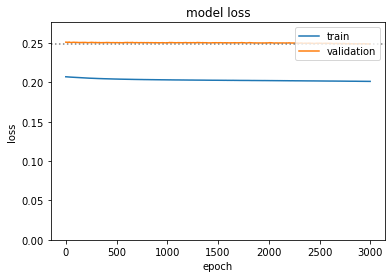

range of prediction :  0.041467845 0.9971125
34/34 [==============================] - 0s 894us/step - loss: 0.2107 - accuracy: 0.9364

Accuracy: 93.64

Confusion Matrix : 
 [[839   9]
 [ 59 163]]


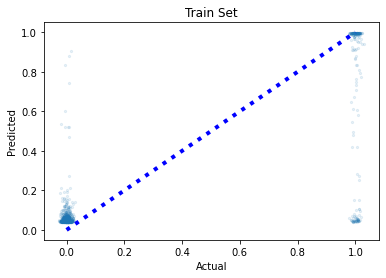

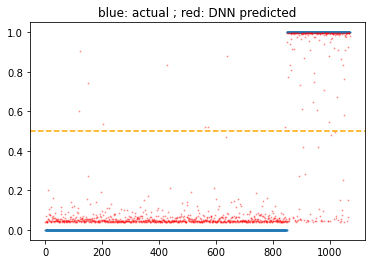

train actual and predicted corr =  0.81877
MAE =  0.10585

r_sqrd =  0.67


In [33]:
print(history.history.keys())

# "Loss"
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
max_loss = np.max([np.max(history.history['loss']), np.max(history.history['val_loss'])])
plt.ylim(0,max_loss*1.1)
plt.axhline(np.percentile(history.history['val_loss'],1), color='grey', linestyle=':')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


y_train_pred = model.predict(X_train)
# y_train_pred = np.where(y_train_pred <0, 0, y_train_pred)
# y_train_pred = np.where(y_train_pred >1, 1, y_train_pred)
print('range of prediction : ', y_train_pred.min(), y_train_pred.max())

# evaluate model :: check accuracy
_, accuracy = model.evaluate(X_train, y_train)
print('\nAccuracy: %.2f' % (accuracy*100))


# import the metrics class
from sklearn import metrics

y_train_pred_cl = np.where(y_train_pred>=0.5,1,0)
cnf_matrix = metrics.confusion_matrix(y_train, y_train_pred_cl)
print('\nConfusion Matrix : \n', cnf_matrix)

#  check distribution of prediction -- train set

fig, ax = plt.subplots()
ax.scatter(rjitt(y_train), y_train_pred, alpha=0.1, s=5)
ax.plot([y_train.min(), 1], [y_train.min(), 1], 'b:', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.title('Train Set')
plt.show()


dftmp_res = pd.DataFrame({'y_actual': y_train, 
              'y_pred': np.reshape(y_train_pred,len(y_train))})
dftmp_res = dftmp_res.sort_values('y_actual')

plt.scatter(range(1,len(y_train)+1), dftmp_res.y_actual, s=1)
plt.scatter(range(1,len(y_train)+1), dftmp_res.y_pred, s=1, color='red', alpha=0.3)
plt.title('blue: actual ; red: DNN predicted')
plt.axhline(0.5, color='orange', linestyle='--')
plt.show()

print('train actual and predicted corr = ' , round(np.corrcoef(y_train, np.reshape(y_train_pred,len(y_train)))[0][1],5 ))

val_MAE = abs(y_train - np.reshape(y_train_pred,len(y_train))).mean()
print('MAE = ', round(val_MAE,5))

from sklearn.metrics import r2_score
print('\nr_sqrd = ', round(r2_score(y_train, np.reshape(y_train_pred,len(y_train))),3))



- Loss 커브의 ideal한 모습
    * 점점 loss 감소
    * train과 validation 유사
    * 커브에 spike, fluctuation이 없는 안정적인 패턴

### Fully Equipped DNN Classifier

In [39]:
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras.layers import Dropout

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(5, activation='relu', input_shape=(5,)))

num_layers = 5
nnode = 512

for _ in range(num_layers):
    # Add hidden layer   
    model.add(Dense(nnode,  activation='relu')) # activation = ['sigmoid', 'relu']
    model.add(Dropout(0.5))
    nnode = int(nnode/2) # to diminish node size

# Add an output layer 
model.add(Dense(1,  activation='sigmoid'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_26 (Dense)             (None, 512)               3072      
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)              

In [44]:
# fitting (training) DNN

import datetime

model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

start_time = datetime.datetime.now()
print('start : ', start_time )
history = model.fit(X_train, y_train, epochs=50, batch_size=16,
                    verbose=1, validation_split=0.2)

end_time = datetime.datetime.now()
print('end : ', end_time )
print('runtime : ', end_time - start_time)
model.summary()

start :  2020-12-11 13:49:15.162356
Epoch 1/50
54/54 [==============================] - 0s 8ms/step - loss: 0.1694 - accuracy: 0.9439 - val_loss: 0.7387 - val_accuracy: 0.9159
Epoch 2/50
54/54 [==============================] - 0s 4ms/step - loss: 0.2151 - accuracy: 0.9439 - val_loss: 0.4779 - val_accuracy: 0.9159
Epoch 3/50
54/54 [==============================] - 0s 5ms/step - loss: 0.1762 - accuracy: 0.9416 - val_loss: 0.5122 - val_accuracy: 0.9159
Epoch 4/50
54/54 [==============================] - 0s 5ms/step - loss: 0.1610 - accuracy: 0.9416 - val_loss: 0.6229 - val_accuracy: 0.9159
Epoch 5/50
54/54 [==============================] - 0s 5ms/step - loss: 0.1870 - accuracy: 0.9428 - val_loss: 0.3503 - val_accuracy: 0.9159
Epoch 6/50
54/54 [==============================] - 0s 4ms/step - loss: 0.1740 - accuracy: 0.9428 - val_loss: 0.4289 - val_accuracy: 0.9112
Epoch 7/50
54/54 [==============================] - 0s 4ms/step - loss: 0.1776 - accuracy: 0.9439 - val_loss: 0.3791 - val_a

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


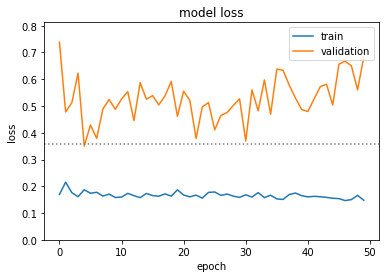

range of prediction :  0.0 1.0
34/34 [==============================] - 0s 1ms/step - loss: 0.2442 - accuracy: 0.9411

Accuracy: 94.11

Confusion Matrix : 
 [[847   1]
 [ 62 160]]


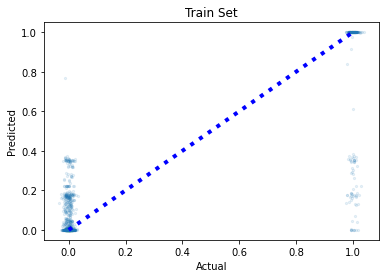

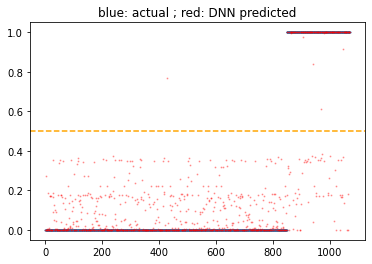

train actual and predicted corr =  0.83865
MAE =  0.0968

r_sqrd =  0.703


---


range of prediction :  0.0 1.0

Confusion Matrix : 
 [[216   1]
 [ 12  39]]
9/9 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.9515

Accuracy: 95.15
AUC: 0.911


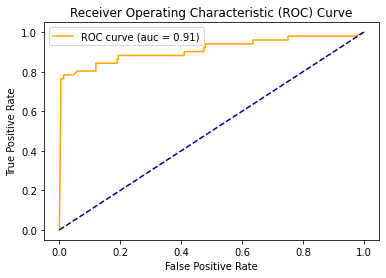

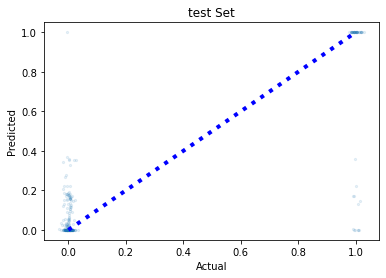

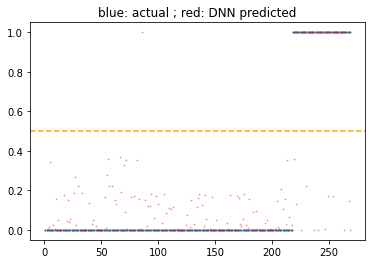

test actual and predicted corr =  0.82866
MAE =  0.08615

r_sqrd =  0.684


In [45]:
print(history.history.keys())

# "Loss"
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
max_loss = np.max([np.max(history.history['loss']), np.max(history.history['val_loss'])])
plt.ylim(0,max_loss*1.1)
plt.axhline(np.percentile(history.history['val_loss'],1), color='grey', linestyle=':')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


y_train_pred = model.predict(X_train)
# y_train_pred = np.where(y_train_pred <0, 0, y_train_pred)
# y_train_pred = np.where(y_train_pred >1, 1, y_train_pred)
print('range of prediction : ', y_train_pred.min(), y_train_pred.max())


from sklearn.metrics import accuracy_score

# evaluate model :: check accuracy
_, accuracy = model.evaluate(X_train, y_train)
print('\nAccuracy: %.2f' % (accuracy*100))


# import the metrics class
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

y_train_pred_cl = np.where(y_train_pred>=0.5,1,0)
cnf_matrix = metrics.confusion_matrix(y_train, y_train_pred_cl)
print('\nConfusion Matrix : \n', cnf_matrix)

#  check distribution of prediction -- train set

fig, ax = plt.subplots()
ax.scatter(rjitt(y_train), y_train_pred, alpha=0.1, s=5)
ax.plot([y_train.min(), 1], [y_train.min(), 1], 'b:', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.title('Train Set')
plt.show()


dftmp_res = pd.DataFrame({'y_actual': y_train, 
              'y_pred': np.reshape(y_train_pred,len(y_train))})
dftmp_res = dftmp_res.sort_values('y_actual')

plt.scatter(range(1,len(y_train)+1), dftmp_res.y_actual, s=1)
plt.scatter(range(1,len(y_train)+1), dftmp_res.y_pred, s=1, color='red', alpha=0.3)
plt.title('blue: actual ; red: DNN predicted')
plt.axhline(0.5, color='orange', linestyle='--')
plt.show()

print('train actual and predicted corr = ' , round(np.corrcoef(y_train, np.reshape(y_train_pred,len(y_train)))[0][1],5 ))

val_MAE = abs(y_train - np.reshape(y_train_pred,len(y_train))).mean()
print('MAE = ', round(val_MAE,5))

from sklearn.metrics import r2_score
print('\nr_sqrd = ', round(r2_score(y_train, np.reshape(y_train_pred,len(y_train))),3))

print("\n\n---\n\n")


# import the metrics class
from sklearn import metrics

y_test_pred = model.predict(X_test)
# y_test_pred = np.where(y_test_pred <0, 0, y_test_pred)
# y_test_pred = np.where(y_test_pred >1, 1, y_test_pred)
print('range of prediction : ', y_test_pred.min(), y_test_pred.max())

y_test_pred_cl = np.where(y_test_pred>=0.5,1,0)
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred_cl)
print('\nConfusion Matrix : \n', cnf_matrix)

# evaluate model :: check accuracy
_, accuracy = model.evaluate(X_test, y_test)
print('\nAccuracy: %.2f' % (accuracy*100))
# print('Accuracy: ', (cnf_matrix[0,0]+cnf_matrix[1,1])/cnf_matrix.sum()*100)



auc = roc_auc_score(y_test, y_test_pred)
print('AUC: %.3f' % auc)

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC curve (auc = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)    
plot_roc_curve(fpr, tpr)



#  check distribution of prediction -- test set

fig, ax = plt.subplots()
ax.scatter(rjitt(y_test), y_test_pred, alpha=0.1, s=5)
ax.plot([y_test.min(), 1], [y_test.min(), 1], 'b:', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.title('test Set')
plt.show()


dftmp_res = pd.DataFrame({'y_actual': y_test, 
              'y_pred': np.reshape(y_test_pred,len(y_test))})
dftmp_res = dftmp_res.sort_values('y_actual')

plt.scatter(range(1,len(y_test)+1), dftmp_res.y_actual, s=1)
plt.scatter(range(1,len(y_test)+1), dftmp_res.y_pred, s=1, color='red', alpha=0.3)
plt.title('blue: actual ; red: DNN predicted')
plt.axhline(0.5, color='orange', linestyle='--')
plt.show()

print('test actual and predicted corr = ' , round(np.corrcoef(y_test, np.reshape(y_test_pred,len(y_test)))[0][1],5 ))

val_MAE = abs(y_test - np.reshape(y_test_pred,len(y_test))).mean()
print('MAE = ', round(val_MAE,5))

from sklearn.metrics import r2_score
print('\nr_sqrd = ', round(r2_score(y_test, np.reshape(y_test_pred,len(y_test))),3))




### CatBoost for comparison

   age     sex     bmi  children smoker     region
0   19  female  27.900         0    yes  southwest
1   18    male  33.770         1     no  southeast
2   28    male  33.000         3     no  southeast
3   33    male  22.705         0     no  northwest
4   32    male  28.880         0     no  northwest
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
dtype: object
[1 4 5]
Learning rate set to 0.032223
0:	learn: 0.9028037	test: 0.9028037	best: 0.9028037 (0)	total: 93.3ms	remaining: 1m 33s
100:	learn: 0.9476636	test: 0.9467290	best: 0.9467290 (100)	total: 2.98s	remaining: 26.5s
200:	learn: 0.9514019	test: 0.9476636	best: 0.9476636 (200)	total: 6.14s	remaining: 24.4s
300:	learn: 0.9654206	test: 0.9514019	best: 0.9514019 (300)	total: 10.3s	remaining: 23.9s
400:	learn: 0.9831776	test: 0.9579439	best: 0.9579439 (400)	total: 14.7s	remaining: 21.9s
500:	learn: 0.9915888	test: 0.9682243	best: 0.9682243 (500)	total: 19.1s	r

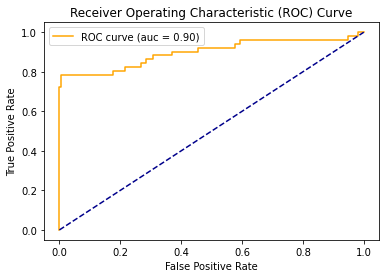


Confusion Matrix (test set) :
 [[215   2]
 [ 11  40]]
PCNT accuracy = 95.15 
range of prediction :  0.00019452057927990058 0.9997850153923891


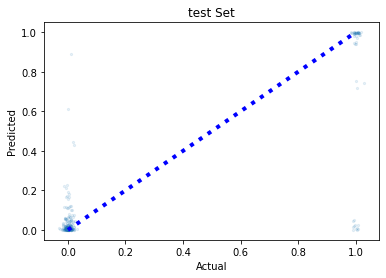

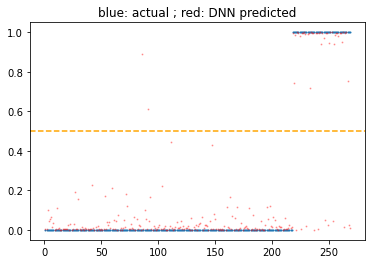

test actual and predicted corr =  0.83089
MAE =  0.07459

r_sqrd =  0.687


In [46]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from catboost import CatBoostClassifier

dfdt = dfi01.iloc[:,:6]
tgt = bin_tgt

print(dfdt.head())

categorical_features_indices = np.where(dfdt.dtypes ==np.object)[0]
print(dfdt.dtypes)
print(categorical_features_indices)

# Partitioning
trainX, testX, trainy, testy = train_test_split(dfdt, tgt, test_size=0.2, random_state=12)

cbmodel = CatBoostClassifier(iterations=1000, eval_metric='Accuracy', 
                             use_best_model=True,
                             random_seed=0,
                             depth=9, 
                             metric_period = 100)
cbmodel.fit(trainX, trainy, cat_features=categorical_features_indices,
           eval_set=(trainX, trainy))

probs = cbmodel.predict_proba(testX)
preds = probs[:,1]

# preds = probs


auc = roc_auc_score(testy, preds)
print('AUC: %.3f' % auc)

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC curve (auc = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


fpr, tpr, thresholds = roc_curve(testy.astype(int), preds)    
plot_roc_curve(fpr, tpr)



# import the metrics class
from sklearn import metrics
from sklearn.metrics import accuracy_score

cnf_matrix = metrics.confusion_matrix(testy, cbmodel.predict(testX))
print('\nConfusion Matrix (test set) :\n', cnf_matrix)

accuracy = accuracy_score(testy, cbmodel.predict(testX)) * 100
print('PCNT accuracy = %0.2f ' % accuracy)

y_test_pred = preds
print('range of prediction : ', y_test_pred.min(), y_test_pred.max())

#  check distribution of prediction -- test set

fig, ax = plt.subplots()
ax.scatter(rjitt(testy), y_test_pred, alpha=0.1, s=5)
ax.plot([y_test.min(), 1], [y_test.min(), 1], 'b:', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.title('test Set')
plt.show()


dftmp_res = pd.DataFrame({'y_actual': y_test, 
              'y_pred': np.reshape(y_test_pred,len(y_test))})
dftmp_res = dftmp_res.sort_values('y_actual')

plt.scatter(range(1,len(y_test)+1), dftmp_res.y_actual, s=1)
plt.scatter(range(1,len(y_test)+1), dftmp_res.y_pred, s=1, color='red', alpha=0.3)
plt.title('blue: actual ; red: DNN predicted')
plt.axhline(0.5, color='orange', linestyle='--')
plt.show()

print('test actual and predicted corr = ' , round(np.corrcoef(y_test, np.reshape(y_test_pred,len(y_test)))[0][1],5 ))

val_MAE = abs(y_test - np.reshape(y_test_pred,len(y_test))).mean()
print('MAE = ', round(val_MAE,5))

from sklearn.metrics import r2_score
print('\nr_sqrd = ', round(r2_score(y_test, np.reshape(y_test_pred,len(y_test))),3))


<Figure size 432x288 with 0 Axes>

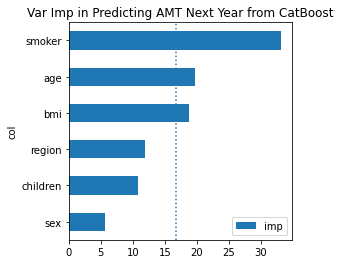

,imp,col,cum_sum_imp
4,33.12,smoker,33.12
0,19.65,age,52.77
2,18.81,bmi,71.58
5,11.97,region,83.55
3,10.78,children,94.33
1,5.66,sex,99.99
row_total,99.99,sexchildrenregionbmiagesmoker,NaN


In [47]:
# Mapping Feature Importance

plt.figure()
fea_imp = pd.DataFrame({'imp': cbmodel.feature_importances_, 'col': trainX.columns})
fea_imp['imp'] = round(fea_imp.imp, 2)
mean_vimp = fea_imp.imp.mean()
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False])
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(4, 4))
plt.title('Var Imp in Predicting AMT Next Year from CatBoost')
plt.axvline(mean_vimp, linestyle=':')
plt.show()

fea_imp1 = fea_imp.sort_values('imp', ascending=False)

# add row total
fea_imp1['cum_sum_imp']= round(fea_imp1['imp'].cumsum(),2)
fea_imp1.loc['row_total'] = fea_imp.apply(lambda x: x.sum())
fea_imp1

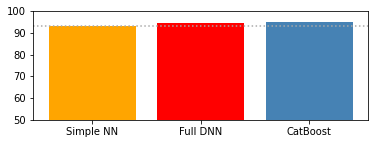

In [15]:
# accuracy comparison

mdl_nm = ['Simple NN', 'Full DNN', 'CatBoost']
mdl_accuracy = [ 93,  94.40, 95.15] 

colors = ['orange', 'red', 'steelblue']

plt.figure(figsize=(6,2))
plt.bar(mdl_nm, mdl_accuracy,
        color=colors)
plt.ylim(50,100)
plt.axhline(np.min(mdl_accuracy), color='darkgrey', linestyle=":")
plt.show()

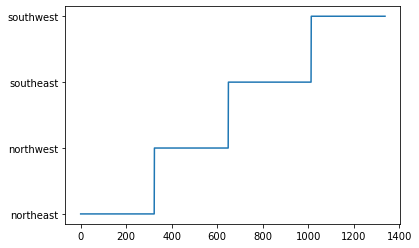

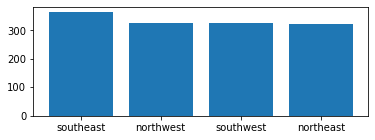

In [48]:
# check distribution of categorical variable "region"
plt.plot(np.sort(dfi01.region))
plt.show()

# alternatively
plt.figure(figsize=(6,2))
plt.bar(dfi01.region.value_counts().to_frame().index, 
        dfi01.region.value_counts().to_frame().region)
plt.show()

- region이 상당한 중요도를 가진 변수를 사실을 파악했다면 DNN에도 추가로 투입?
- region은 catgory 변수이므로 encoding !

In [49]:
# Ecoding Resion using OneHotEncoder

# import preprocessing from sklearn
from sklearn import preprocessing

enc = preprocessing.OneHotEncoder()

# FIT
arr = np.array(dfi01['region']).reshape(-1, 1)
enc.fit(arr)

# Transform
onehotlabels = enc.transform(arr).toarray()
print(onehotlabels.shape)

ohn_region = pd.DataFrame(onehotlabels)
ohn_region.columns = ['is_SE', 'is_NW', 'is_SW', 'is_NE']
ohn_region.head()


(1338, 4)


,is_SE,is_NW,is_SW,is_NE
0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0


In [50]:
dfi03 = pd.concat([dfi02, ohn_region], axis=1)
dfi03.head()

,age,is_female,bmi,children,is_smoker,charges,is_SE,is_NW,is_SW,is_NE
0,19,1,27.900,0,1,16884.92400,0.0,0.0,0.0,1.0
1,18,0,33.770,1,0,1725.55230,0.0,0.0,1.0,0.0
2,28,0,33.000,3,0,4449.46200,0.0,0.0,1.0,0.0
3,33,0,22.705,0,0,21984.47061,0.0,1.0,0.0,0.0
4,32,0,28.880,0,0,3866.85520,0.0,1.0,0.0,0.0


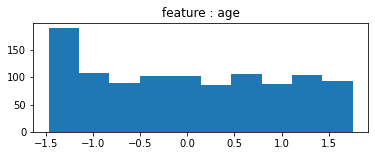

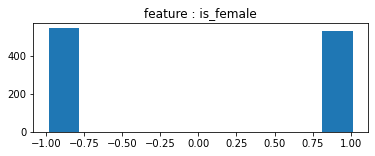

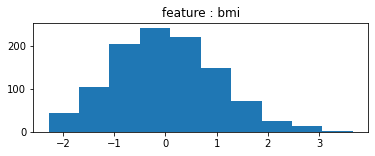

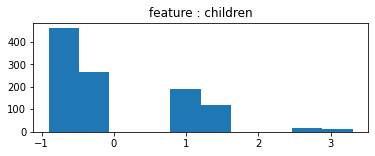

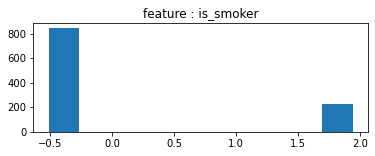

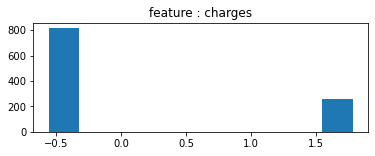

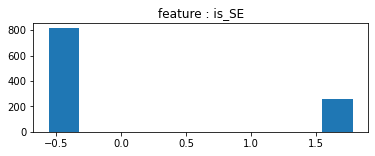

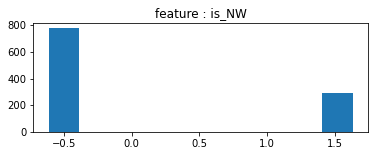

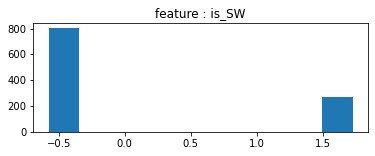

In [51]:
# [Partitioning] 

X = dfi03.drop('charges', axis=1)

# Split the data up in train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)


# [Scaling Inputs]

# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set based on train set distribution
X_train = scaler.transform(X_train)

# Scale the test set based on train set distribution
X_test = scaler.transform(X_test)

features_ = dfi03.iloc[:,0:9].columns
# check the dstributions after scaling
for x in range(len(features_)):
    plt.figure(figsize=(6,2))
    plt.hist(X_train[:,x])
    title = 'feature : ' + features_[x]
    plt.title(title)
    plt.show()
    

In [53]:
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras.layers import Dropout

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(9, activation='relu', input_shape=(9,)))

# 훌륭한 AutoML 이 있었으면 .... Pseudo Optimal을 신속하게~~

num_layers = 5
nnode = 512

for _ in range(num_layers):
    # Add hidden layer   
    model.add(Dense(nnode,  activation='relu')) # activation = ['sigmoid', 'relu']
    model.add(Dropout(0.5))
    nnode = int(nnode/2)

# Add an output layer 
model.add(Dense(1,  activation='sigmoid'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_40 (Dense)             (None, 512)               5120      
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_41 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_16 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_17 (Dropout)         (None, 128)              

In [58]:
# fitting (training) DNN

import datetime

model.compile(loss='binary_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])

start_time = datetime.datetime.now()
print('start : ', start_time )
history = model.fit(X_train, y_train, epochs=20, batch_size=16,
                    verbose=1, validation_split=0.2)

end_time = datetime.datetime.now()
print('end : ', end_time )
print('runtime : ', end_time - start_time)
model.summary()


start :  2020-12-11 14:05:46.762090
Epoch 1/20
54/54 [==============================] - 1s 17ms/step - loss: 0.1938 - accuracy: 0.9451 - val_loss: 0.7066 - val_accuracy: 0.9019
Epoch 2/20
54/54 [==============================] - 0s 4ms/step - loss: 0.1603 - accuracy: 0.9463 - val_loss: 0.7338 - val_accuracy: 0.9019
Epoch 3/20
54/54 [==============================] - 0s 4ms/step - loss: 0.1811 - accuracy: 0.9428 - val_loss: 0.6969 - val_accuracy: 0.9065
Epoch 4/20
54/54 [==============================] - 0s 4ms/step - loss: 0.1631 - accuracy: 0.9439 - val_loss: 0.8025 - val_accuracy: 0.9065
Epoch 5/20
54/54 [==============================] - 0s 5ms/step - loss: 0.1890 - accuracy: 0.9404 - val_loss: 0.5396 - val_accuracy: 0.9065
Epoch 6/20
54/54 [==============================] - 0s 5ms/step - loss: 0.1765 - accuracy: 0.9404 - val_loss: 0.5932 - val_accuracy: 0.9065
Epoch 7/20
54/54 [==============================] - 0s 5ms/step - loss: 0.1804 - accuracy: 0.9381 - val_loss: 0.5604 - val_

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


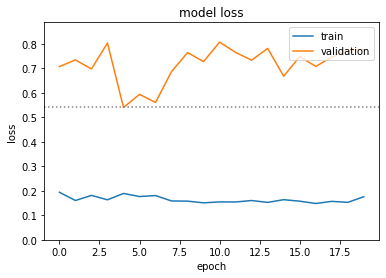

range of prediction :  5.0569452e-21 1.0
34/34 [==============================] - 0s 1ms/step - loss: 0.2692 - accuracy: 0.9308

Accuracy: 93.08

Confusion Matrix : 
 [[847   1]
 [ 73 149]]


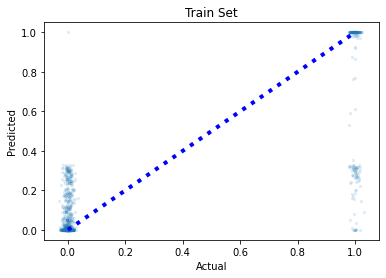

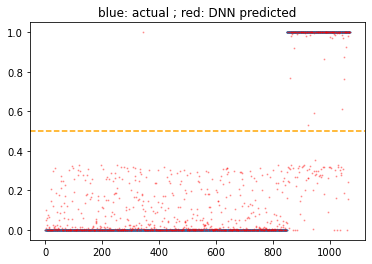

train actual and predicted corr =  0.8243
MAE =  0.10299

r_sqrd =  0.679


---


range of prediction :  7.781055e-17 1.0
9/9 [==============================] - 0s 1ms/step - loss: 0.3676 - accuracy: 0.9440

Accuracy: 94.40
AUC: 0.894


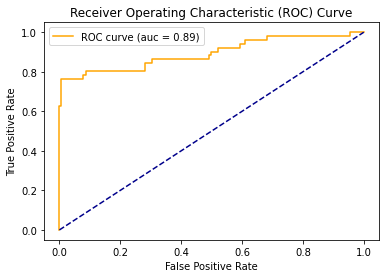


Confusion Matrix : 
 [[216   1]
 [ 14  37]]


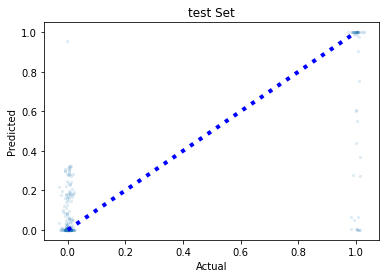

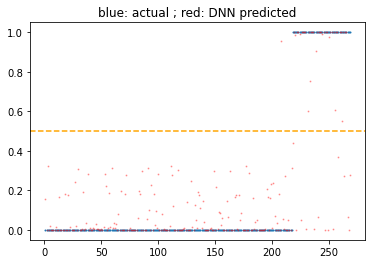

test actual and predicted corr =  0.78776
MAE =  0.10599

r_sqrd =  0.618


In [59]:
print(history.history.keys())

# "Loss"
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
max_loss = np.max([np.max(history.history['loss']), np.max(history.history['val_loss'])])
plt.ylim(0,max_loss*1.1)
plt.axhline(np.percentile(history.history['val_loss'],1), color='grey', linestyle=':')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


y_train_pred = model.predict(X_train)
print('range of prediction : ', y_train_pred.min(), y_train_pred.max())

# evaluate model :: check accuracy
_, accuracy = model.evaluate(X_train, y_train)
print('\nAccuracy: %.2f' % (accuracy*100))


# import the metrics class
from sklearn import metrics
y_train_pred_cl = np.where(y_train_pred>=0.5,1,0)
cnf_matrix = metrics.confusion_matrix(y_train, y_train_pred_cl)
print('\nConfusion Matrix : \n', cnf_matrix)

#  check distribution of prediction -- train set

fig, ax = plt.subplots()
ax.scatter(rjitt(y_train), y_train_pred, alpha=0.1, s=5)
ax.plot([y_train.min(), 1], [y_train.min(), 1], 'b:', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.title('Train Set')
plt.show()


dftmp_res = pd.DataFrame({'y_actual': y_train, 
              'y_pred': np.reshape(y_train_pred,len(y_train))})
dftmp_res = dftmp_res.sort_values('y_actual')

plt.scatter(range(1,len(y_train)+1), dftmp_res.y_actual, s=1)
plt.scatter(range(1,len(y_train)+1), dftmp_res.y_pred, s=1, color='red', alpha=0.3)
plt.title('blue: actual ; red: DNN predicted')
plt.axhline(0.5, color='orange', linestyle='--')
plt.show()

print('train actual and predicted corr = ' , round(np.corrcoef(y_train, np.reshape(y_train_pred,len(y_train)))[0][1],5 ))

val_MAE = abs(y_train - np.reshape(y_train_pred,len(y_train))).mean()
print('MAE = ', round(val_MAE,5))

from sklearn.metrics import r2_score
print('\nr_sqrd = ', round(r2_score(y_train, np.reshape(y_train_pred,len(y_train))),3))

print("\n\n---\n\n")


y_test_pred = model.predict(X_test)
# y_test_pred = np.where(y_test_pred <0, 0, y_test_pred)
# y_test_pred = np.where(y_test_pred >1, 1, y_test_pred)
print('range of prediction : ', y_test_pred.min(), y_test_pred.max())

# evaluate model :: check accuracy
_, accuracy = model.evaluate(X_test, y_test)
print('\nAccuracy: %.2f' % (accuracy*100))


auc = roc_auc_score(y_test, y_test_pred)
print('AUC: %.3f' % auc)

def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC curve (auc = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)    
plot_roc_curve(fpr, tpr)



# import the metrics class
from sklearn import metrics
y_test_pred_cl = np.where(y_test_pred>=0.5,1,0)
cnf_matrix = metrics.confusion_matrix(y_test, y_test_pred_cl)
print('\nConfusion Matrix : \n', cnf_matrix)

#  check distribution of prediction -- test set

fig, ax = plt.subplots()
ax.scatter(rjitt(y_test), y_test_pred, alpha=0.1, s=5)
ax.plot([y_test.min(), 1], [y_test.min(), 1], 'b:', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.title('test Set')
plt.show()


dftmp_res = pd.DataFrame({'y_actual': y_test, 
              'y_pred': np.reshape(y_test_pred,len(y_test))})
dftmp_res = dftmp_res.sort_values('y_actual')

plt.scatter(range(1,len(y_test)+1), dftmp_res.y_actual, s=1)
plt.scatter(range(1,len(y_test)+1), dftmp_res.y_pred, s=1, color='red', alpha=0.3)
plt.title('blue: actual ; red: DNN predicted')
plt.axhline(0.5, color='orange', linestyle='--')
plt.show()

print('test actual and predicted corr = ' , round(np.corrcoef(y_test, np.reshape(y_test_pred,len(y_test)))[0][1],5 ))

val_MAE = abs(y_test - np.reshape(y_test_pred,len(y_test))).mean()
print('MAE = ', round(val_MAE,5))

from sklearn.metrics import r2_score
print('\nr_sqrd = ', round(r2_score(y_test, np.reshape(y_test_pred,len(y_test))),3))


- [생각해볼 것] train accuracy 보다 test accuracy가 높은데 , .... accuracy가 향상된 것으로 볼 수 있을까?

### [실습] Credit Card Default Prediction
dfcr01 = pd.read_csv(dataPath + 'UCI_credit_card.csv')

### For Regression - Loading [Virtual] Customer Transaction Dataset 

In [60]:
dfm01 = pd.read_csv(dataPath + 'dfc20bs.csv')
dfm01.head()

,Unnamed: 0,custid,age,sex,marital,area,education,amt_nike,amt_hnm,amt_strbk,...,amt_book,amt_htl,amt_prmmsneakers,amt_food,amt_beauty,cnt_pstyr,amt_pstyr,cnt_login,amt_nxtyr,cnt_nxtyr
0,0,1,27,F,single,SEOL,university,25100,0,20000,...,0,0,0,182.744231,24400,4,209321.0,15,185921,3
1,1,2,28,F,single,SEOL,university,21500,0,21700,...,0,0,0,43507.134000,23500,3,188514.0,17,271796,8
2,2,3,27,F,single,SEOL,university,0,0,20200,...,0,0,0,194.922917,25200,2,206183.0,16,369348,3
3,3,4,27,F,single,SEOL,college,0,0,0,...,0,0,0,121.457143,27000,2,226851.0,10,387005,8
4,4,5,27,F,single,SEOL,university,20100,0,34000,...,0,0,76700,267.888462,24600,4,221491.0,22,204884,10


### EDA - 데이터 기본 특성 파악

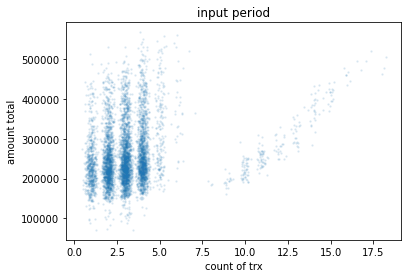

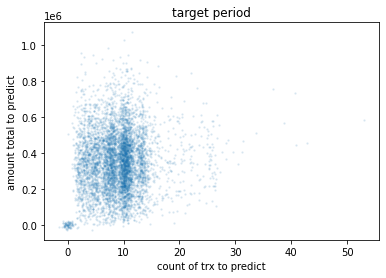

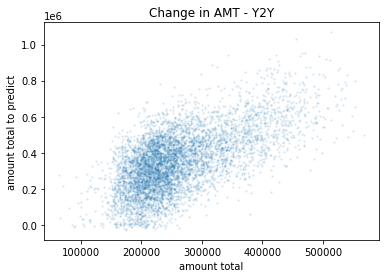

corr =  0.6261566670790372


In [61]:
# Check the distribution of the target first

plt.scatter(rjitt(dfm01.cnt_pstyr), rjitt(dfm01.amt_pstyr), s=2, alpha=0.1)
plt.title('input period')
plt.xlabel('count of trx')
plt.ylabel('amount total')
plt.show()

plt.scatter(rjitt(dfm01.cnt_nxtyr), rjitt(dfm01.amt_nxtyr), s=2, alpha=0.1)
plt.title('target period')
plt.xlabel('count of trx to predict')
plt.ylabel('amount total to predict')
plt.show()

plt.scatter(rjitt(dfm01.amt_pstyr), rjitt(dfm01.amt_nxtyr), s=2, alpha=0.1)
plt.title('Change in AMT - Y2Y')
plt.xlabel('amount total')
plt.ylabel('amount total to predict')
plt.show()

print('corr = ', np.corrcoef(dfm01.amt_pstyr, dfm01.amt_nxtyr)[0,1])

In [62]:
print(dfm01.columns)

# ['amt_nxtyr', 'cnt_nxtyr'] 미래 시점의 변수이므로 잠재적인 Target to predict

Index(['Unnamed: 0', 'custid', 'age', 'sex', 'marital', 'area', 'education',
       'amt_nike', 'amt_hnm', 'amt_strbk', 'amt_dgt', 'amt_book', 'amt_htl',
       'amt_prmmsneakers', 'amt_food', 'amt_beauty', 'cnt_pstyr', 'amt_pstyr',
       'cnt_login', 'amt_nxtyr', 'cnt_nxtyr'],
      dtype='object')


In [63]:
# 5천명의 여성고객에 한정해서 분석 실시 

dfm02 = dfm01[dfm01.sex=='F'][['custid',  'age',
                               'amt_nike', 'amt_hnm', 'amt_strbk', 'amt_dgt', 'amt_book', 'amt_htl',
                               'amt_prmmsneakers', 'amt_food', 'amt_beauty', 'cnt_pstyr', 'amt_pstyr',
                               'cnt_login', 'amt_nxtyr', 'cnt_nxtyr']]
print(dfm02.shape)
dfm02.head()

(5000, 16)


,custid,age,amt_nike,amt_hnm,amt_strbk,amt_dgt,amt_book,amt_htl,amt_prmmsneakers,amt_food,amt_beauty,cnt_pstyr,amt_pstyr,cnt_login,amt_nxtyr,cnt_nxtyr
0,1,27,25100,0,20000,0,0,0,0,182.744231,24400,4,209321.0,15,185921,3
1,2,28,21500,0,21700,0,0,0,0,43507.134000,23500,3,188514.0,17,271796,8
2,3,27,0,0,20200,0,0,0,0,194.922917,25200,2,206183.0,16,369348,3
3,4,27,0,0,0,0,0,0,0,121.457143,27000,2,226851.0,10,387005,8
4,5,27,20100,0,34000,0,0,0,76700,267.888462,24600,4,221491.0,22,204884,10


In [64]:
print(dfm02.iloc[:,1:14].shape)
features_ = dfm02.iloc[:,1:14].columns
features_

(5000, 13)


Index(['age', 'amt_nike', 'amt_hnm', 'amt_strbk', 'amt_dgt', 'amt_book',
       'amt_htl', 'amt_prmmsneakers', 'amt_food', 'amt_beauty', 'cnt_pstyr',
       'amt_pstyr', 'cnt_login'],
      dtype='object')

In [104]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

# Specify the data 
X=dfm02.iloc[:,1:14]
print(dfm02.iloc[:,1:14].head(3))

# Specify the target 
# 미래 1년간의 구매건수(cnt_nxtyr) 를 Target으로 설정
# y=np.ravel(np.where(dfm02.cnt_nxtyr==0, abs(rjitt(dfm02.cnt_nxtyr)), dfm02.cnt_nxtyr))
y=np.ravel(dfm02.amt_nxtyr)

# [Partitioning] Split the data up in train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 아웃라이어 대비한 처리
y_max = np.percentile(y_train, 99.9)
y_train = np.where(y_train>y_max, y_max, y_train)
y_train = y_train/y_max
y_test = np.where(y_test>y_max, y_max, y_test)
y_test = y_test/y_max

   age  amt_nike  amt_hnm  amt_strbk  amt_dgt  amt_book  amt_htl  \
0   27     25100        0      20000        0         0        0   
1   28     21500        0      21700        0         0        0   
2   27         0        0      20200        0         0        0   

   amt_prmmsneakers      amt_food  amt_beauty  cnt_pstyr  amt_pstyr  cnt_login  
0                 0    182.744231       24400          4   209321.0         15  
1                 0  43507.134000       23500          3   188514.0         17  
2                 0    194.922917       25200          2   206183.0         16  


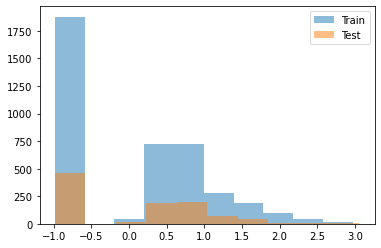

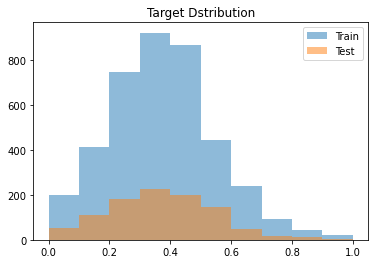

In [105]:
# [Scaling]

# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set based on train set distribution
X_train = scaler.transform(X_train)

# Scale the test set based on train set distribution
X_test = scaler.transform(X_test)


# check the dstributions after scaling
plt.hist(X_train[:,9], alpha=0.5)
plt.hist(X_test[:,9], alpha=0.5)
plt.legend(['Train','Test'])
plt.show()

# check the dstributions after scaling
plt.hist(y_train, alpha=0.5)
plt.hist(y_test, alpha=0.5)
plt.title('Target Dstribution')
plt.legend(['Train','Test'])
plt.show()

[ a DNN reference from datacamp ] (https://www.datacamp.com/community/tutorials/deep-learning-python?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=1t2&utm_creative=278443377086&utm_targetid=aud-299261629574:dsa-473406573755&utm_loc_interest_ms=&utm_loc_physical_ms=1009871&gclid=CjwKCAjw-vjqBRA6EiwAe8TCk2BLxXla9aXY0oBkrcxhKB0s_lfEFe0okbC0Z8JcxLMm88yyI0X2jBoCeTcQAvD_BwE )

### very simple DNN

In [80]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense
# import dropout
from keras.layers import Dropout
from keras import regularizers

# Initialize the constructor
model = Sequential()


# Add an input layer 
model.add(Dense(13, activation='linear', input_shape=(13,)))

num_layers = 1 # [1, 2, 6]
nnode =32 # [2, 4, 8, 16, 32, 64]

for _ in range(num_layers):
    # Add hidden layer   
    model.add(Dense(nnode,  activation='linear')) # activation = ['linear', 'sigmoid', 'relu']

# Add an output layer 
model.add(Dense(1,  activation='linear'))

# Got to fit section !!

In [84]:
# fitting (training) DNN
import datetime
from keras import optimizers

model.compile(loss='mse',
              optimizer='adam',
              metrics=['mae'])

start_time = datetime.datetime.now()
print('start : ', start_time )

history = model.fit(X_train, y_train, epochs=100, batch_size=16,
                    verbose=1, validation_split=0.2)

end_time = datetime.datetime.now()
print('end : ', end_time )
print('runtime : ', end_time - start_time)
model.summary()

start :  2020-12-11 14:22:55.684408
Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.0228 - mae: 0.1213 - val_loss: 0.0219 - val_mae: 0.1216
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.0223 - mae: 0.1199 - val_loss: 0.0224 - val_mae: 0.1227
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.0225 - mae: 0.1202 - val_loss: 0.0224 - val_mae: 0.1225
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.0224 - mae: 0.1194 - val_loss: 0.0223 - val_mae: 0.1224
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.0224 - mae: 0.1198 - val_loss: 0.0236 - val_mae: 0.1261
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.0222 - mae: 0.1196 - val_loss: 0.0218 - val_mae: 0.1214
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.0222 - mae: 0.1194 - val_loss: 0.0216 - val_mae: 0.1197
Epoch 8/100
200/200 [============

200/200 [==============================] - 0s 2ms/step - loss: 0.0218 - mae: 0.1185 - val_loss: 0.0215 - val_mae: 0.1208
Epoch 61/100
200/200 [==============================] - 0s 2ms/step - loss: 0.0218 - mae: 0.1184 - val_loss: 0.0213 - val_mae: 0.1198
Epoch 62/100
200/200 [==============================] - 0s 2ms/step - loss: 0.0219 - mae: 0.1186 - val_loss: 0.0216 - val_mae: 0.1204
Epoch 63/100
200/200 [==============================] - 0s 1ms/step - loss: 0.0218 - mae: 0.1185 - val_loss: 0.0216 - val_mae: 0.1207
Epoch 64/100
200/200 [==============================] - 0s 1ms/step - loss: 0.0219 - mae: 0.1188 - val_loss: 0.0214 - val_mae: 0.1202
Epoch 65/100
200/200 [==============================] - 0s 1ms/step - loss: 0.0217 - mae: 0.1184 - val_loss: 0.0213 - val_mae: 0.1199
Epoch 66/100
200/200 [==============================] - 0s 1ms/step - loss: 0.0219 - mae: 0.1186 - val_loss: 0.0211 - val_mae: 0.1193
Epoch 67/100
200/200 [==============================] - 0s 1ms/step - loss:

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
min 1% validation loss(MSE) :  0.021077405754476787


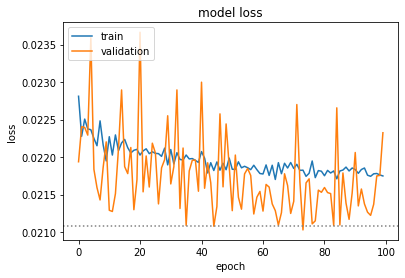

range of train set :  0.0 1.0
range of prediction :  0.1579515 0.76387167


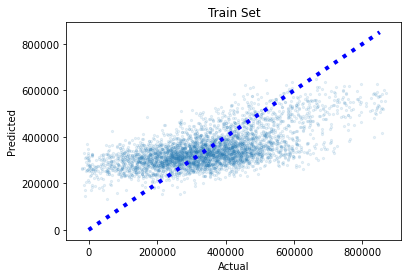

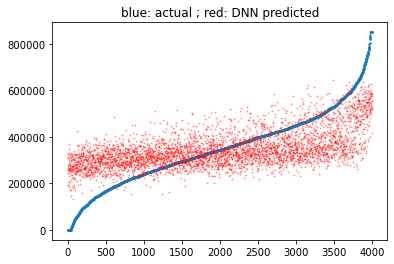

train actual and predicted corr =  0.63782
MAE =  101799.22739  ; MAE/Median =  0.29537
MdAE =  85917.58313  ; MdAE/Median =  0.24929

r_sqrd =  0.384


 ... 
range of test set :  0.0 1.0
range of prediction :  0.2105971 0.76324165


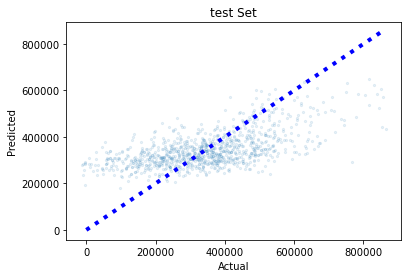

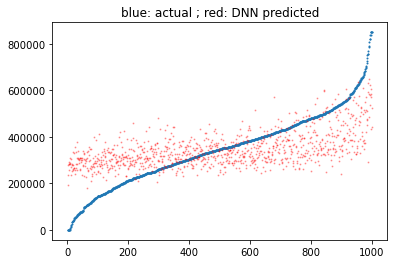

test actual and predicted corr =  0.62261
MAE =  101915.53842  ; MAE/Median =  0.2937
MdAE =  86792.18392  ; MdAE/Median =  0.25012

r_sqrd =  0.365


In [86]:
from sklearn.metrics import r2_score

print(history.history.keys())
print('min 1% validation loss(MSE) : ', np.percentile(history.history['val_loss'],1))

# "Loss"
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.axhline(np.percentile(history.history['val_loss'],1), color='grey', linestyle=':')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


print('range of train set : ', y_train.min(), y_train.max())

y_train_pred = model.predict(X_train)
y_train_pred = np.where(y_train_pred <0, 0, y_train_pred)
y_train_pred = np.where(y_train_pred >1, 1, y_train_pred)
print('range of prediction : ', y_train_pred.min(), y_train_pred.max())


#  check distribution of prediction -- train set

fig, ax = plt.subplots()
ax.scatter(rjitt(y_train*y_max), y_train_pred*y_max, alpha=0.1, s=5)
# ax.plot([y_train.min(), y_train.max()], [y_train_pred.min(), y_train_pred.max()], 'k:', lw=4)
max_range = y_max
ax.plot([y_train.min(), max_range], [y_train.min(), max_range], 'b:', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.title('Train Set')
plt.show()

dftmp_res = pd.DataFrame({'y_actual': y_train, 
              'y_pred': np.reshape(y_train_pred*y_max,len(y_train))})
dftmp_res = dftmp_res.sort_values('y_actual')

plt.scatter(range(1,len(y_train)+1), dftmp_res.y_actual*y_max, s=1)
plt.scatter(range(1,len(y_train)+1), dftmp_res.y_pred, s=1, color='red', alpha=0.3)
plt.title('blue: actual ; red: DNN predicted')
plt.show()

print('train actual and predicted corr = ' , round(np.corrcoef(y_train, np.reshape(y_train_pred,len(y_train)))[0][1],5 ))

val_MAE = abs(y_train - np.reshape(y_train_pred,len(y_train))).mean()
print('MAE = ', round(val_MAE*y_max,5), ' ; MAE/Median = ', round(val_MAE*y_max/np.median(y_train*y_max),5))
val_MdAE = np.median(abs(y_train - np.reshape(y_train_pred,len(y_train))))
print('MdAE = ', round(val_MdAE*y_max,5), ' ; MdAE/Median = ', round(val_MdAE*y_max/np.median(y_train*y_max),5))

print('\nr_sqrd = ', round(r2_score(y_train, np.reshape(y_train_pred,len(y_train))),3))

print('\n\n ... ')



#---------- CHECKing TEST SET result ---------------

print('range of test set : ', y_test.min(), y_test.max())

y_test_pred = model.predict(X_test)
y_test_pred = np.where(y_test_pred <0, 0, y_test_pred)
y_test_pred = np.where(y_test_pred >1, 1, y_test_pred)
print('range of prediction : ', y_test_pred.min(), y_test_pred.max())


#  check distribution of prediction -- test set

fig, ax = plt.subplots()
ax.scatter(rjitt(y_test*y_max), y_test_pred*y_max, alpha=0.1, s=5)
# ax.plot([y_test.min(), y_test.max()], [y_test_pred.min(), y_test_pred.max()], 'k:', lw=4)
max_range = y_max
ax.plot([y_test.min(), max_range], [y_test.min(), max_range], 'b:', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.title('test Set')
plt.show()

dftmp_res = pd.DataFrame({'y_actual': y_test*y_max, 
              'y_pred': np.reshape(y_test_pred*y_max,len(y_test))})
dftmp_res = dftmp_res.sort_values('y_actual')

plt.scatter(range(1,len(y_test)+1), dftmp_res.y_actual, s=1)
plt.scatter(range(1,len(y_test)+1), dftmp_res.y_pred, s=1, color='red', alpha=0.3)
plt.title('blue: actual ; red: DNN predicted')
plt.show()

print('test actual and predicted corr = ' , round(np.corrcoef(dftmp_res.y_actual, dftmp_res.y_pred)[0][1],5 ))

val_MAE = abs(y_test - np.reshape(y_test_pred,len(y_test))).mean()
print('MAE = ', round(val_MAE*y_max,5), ' ; MAE/Median = ', round(val_MAE*y_max/np.median(y_test*y_max),5))
val_MdAE = np.median(abs(y_test - np.reshape(y_test_pred,len(y_test))))
print('MdAE = ', round(val_MdAE*y_max,5), ' ; MdAE/Median = ', round(val_MdAE*y_max/np.median(y_test*y_max),5))

print('\nr_sqrd = ', round(r2_score(dftmp_res.y_actual, dftmp_res.y_pred),3))
# Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse)

- [a jupyter notebook tip] ctrl + / after select lines ==> comment out at once

### Bigger DNN
- [LOSS] At the most basic level, a loss function quantifies how “good” or “bad” a given predictor is at classifying the input data points in a dataset.

We, therefore, seek to:

Drive our loss down, thereby improving our model accuracy.
Do so as fast as possible and with as little hyperparameter updates/experiments.
All without overfitting our network and modeling the training data too closely.<br>:<br>
[sorce] https://www.pyimagesearch.com/2019/10/14/why-is-my-validation-loss-lower-than-my-training-loss

[ 16  28  37  45  67  72  86  96 106  95 102  80  52  42  18  16  11   7
  10   2   4   3   4   0   1] [1.6, 2.8000000000000003, 3.6999999999999997, 4.5, 6.7, 7.199999999999999, 8.6, 9.6, 10.6, 9.5, 10.2, 8.0, 5.2, 4.2, 1.7999999999999998, 1.6, 1.0999999999999999, 0.7000000000000001, 1.0, 0.2, 0.4, 0.3, 0.4, 0.0, 0.1] [0.         0.04341416 0.08682831 0.13024247 0.17365662 0.21707078
 0.26048494 0.30389909 0.34731325 0.3907274  0.43414156 0.47755572
 0.52096987 0.56438403 0.60779819 0.65121234 0.6946265  0.73804065
 0.78145481 0.82486897 0.86828312 0.91169728 0.95511143 0.99852559
 1.04193975 1.0853539 ]


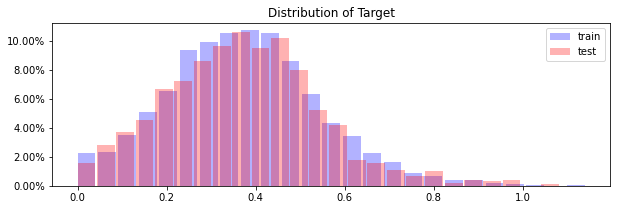

In [87]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

# Specify the data 
X=dfm02.iloc[:,1:14]

# Specify the target 
# 미래 1년간의 구매건수(cnt_nxtyr) 를 Target으로 설정
# y=np.ravel(np.where(dfm02.cnt_nxtyr==0, abs(rjitt(dfm02.cnt_nxtyr)), dfm02.cnt_nxtyr))
y=np.ravel(dfm02.amt_nxtyr)

# scale


# [Partitioning] Split the data up in train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

# 아웃라이어 대비한 처리
y_max = np.percentile(y_train, 99.9)
# y_train = np.where(y_train>y_max, y_max, y_train)
y_train = y_train/y_max
# y_test = np.where(y_test>y_max, y_max, y_test)
y_test = y_test/y_max

# compare distributions
f, ax = plt.subplots(1, 1, figsize=(10,3))
heights, bins = np.histogram(y_train, bins = 25)
percent = [i/sum(heights)*100 for i in heights]
ax.bar(bins[:-1], percent, width=0.04, align="edge", color='blue', alpha=0.3)

heights, bins = np.histogram(y_test, bins = 25)
percent = [i/sum(heights)*100 for i in heights]
print(heights, percent, bins)
ax.bar(bins[:-1], percent, width=0.04, align="edge", color='red', alpha=0.3)

vals = ax.get_yticks()
ax.set_yticklabels(['%1.2f%%' %i for i in vals])
ax.legend(['train','test'])
plt.title('Distribution of Target')
plt.show()


# [Scaling]

# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

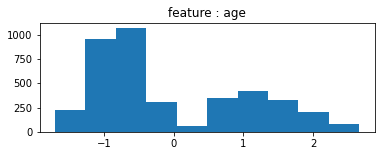

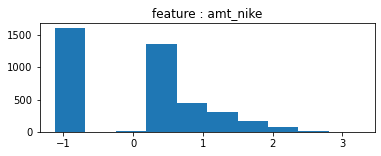

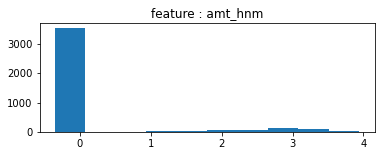

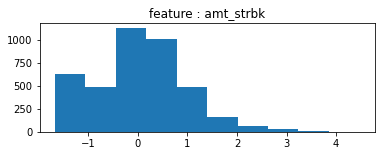

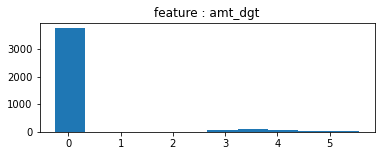

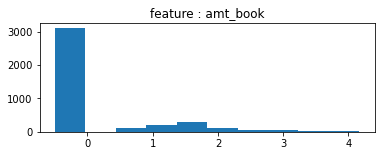

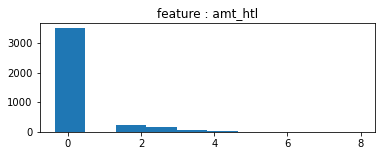

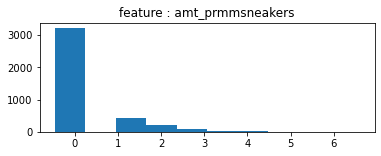

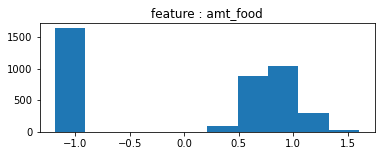

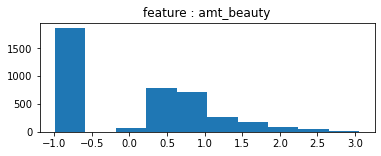

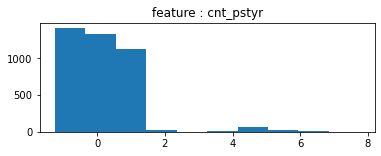

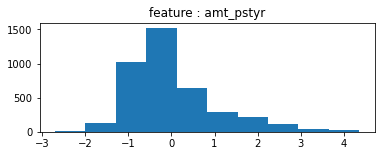

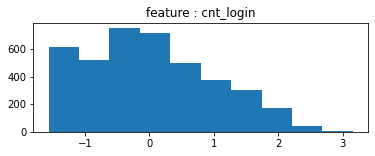

In [88]:
for x in range(13):
    plt.figure(figsize=(6,2))
    plt.hist(X_train[:,x])
    title = 'feature : ' + features_[x]
    plt.title(title)
    plt.show()

In [89]:
# Wide version

# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense
# import dropout
from keras.layers import Dropout
from keras import regularizers

# Initialize the constructor
model = Sequential()

dropout_Rate = 0.3 # 0.2~0.5
actv_func4hl = 'relu'

# Add an input layer 
model.add(Dense(13, activation='linear', input_dim=13))

nlayer = 2
nnode = 1024

for _ in range(nlayer):
    # Add hidden layer   
    print(nnode)
    model.add(Dense(nnode,  activation='linear' ))
    model.add(Dropout(0.2))
    # nnode = int(nnode/2)


# Add an output layer 
model.add(Dense(1, activation='linear'))

1024
1024


In [92]:
# Deep Version

from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense
# import dropout
from keras.layers import Dropout
from keras import regularizers

# Initialize the constructor
model = Sequential()

dropout_Rate = 0.3 # 0.2~0.5
actv_func4hl = 'relu'

# Add an input layer 
model.add(Dense(13, activation='linear', input_dim=13))

nlayer = 12
nnode = 8

for _ in range(nlayer):
    # Add hidden layer   
    print(nnode)
    model.add(Dense(nnode,  activation='linear' ))
    model.add(Dropout(0.2))
    # node = int(nnode/2)


# Add an output layer 
model.add(Dense(1, activation='linear'))

8
8
8
8
8
8
8
8
8
8
8
8


In [99]:
# Final version

# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense
# import dropout
from keras.layers import Dropout
from keras import regularizers

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(13, activation='linear', input_dim=13))

nlayer = 4
nnode = 1024

for _ in range(nlayer):
    # Add hidden layer   
    print(nnode)
    model.add(Dense(nnode,  activation='linear' ))
    model.add(Dropout(0.2))
    nnode = int(nnode/2)


# Add an output layer 
model.add(Dense(1, activation='linear'))

1024
512
256
128


In [100]:
# fitting (training) DNN
from sklearn.metrics import mean_squared_error

import datetime
from keras import optimizers
from keras.optimizers import SGD, Adam

#  generally, the MAE is used in situations in which outliers can be present (Grover, 2019).
model.compile(loss='mae',
              optimizer='adam',
              metrics=['mae']) 

start_time = datetime.datetime.now()
print('strart : ', start_time )

history = model.fit(X_train, y_train, epochs=50, batch_size=16,
                    shuffle=True,
                    verbose=1, validation_split=0.2)

end_time = datetime.datetime.now()
print('end : ', end_time )
print('runtime : ', end_time - start_time)
model.summary()

strart :  2020-12-11 14:46:19.220683
Epoch 1/50
200/200 [==============================] - 2s 10ms/step - loss: 0.3783 - mae: 0.3783 - val_loss: 0.1672 - val_mae: 0.1672
Epoch 2/50
200/200 [==============================] - 2s 8ms/step - loss: 0.2050 - mae: 0.2050 - val_loss: 0.1336 - val_mae: 0.1336
Epoch 3/50
200/200 [==============================] - 2s 9ms/step - loss: 0.1569 - mae: 0.1569 - val_loss: 0.1285 - val_mae: 0.1285
Epoch 4/50
200/200 [==============================] - 2s 9ms/step - loss: 0.1378 - mae: 0.1378 - val_loss: 0.1213 - val_mae: 0.1213
Epoch 5/50
200/200 [==============================] - 2s 8ms/step - loss: 0.1294 - mae: 0.1294 - val_loss: 0.1088 - val_mae: 0.1088
Epoch 6/50
200/200 [==============================] - 1s 7ms/step - loss: 0.1233 - mae: 0.1233 - val_loss: 0.1119 - val_mae: 0.1119
Epoch 7/50
200/200 [==============================] - 2s 8ms/step - loss: 0.1203 - mae: 0.1203 - val_loss: 0.1138 - val_mae: 0.1138
Epoch 8/50
200/200 [==================

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])
min 1% validation loss(MSE) :  0.10846072986721991


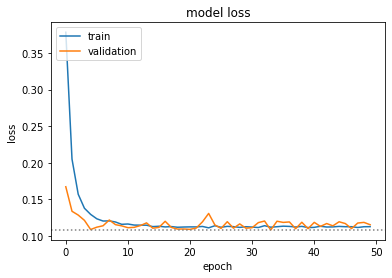

range of train set :  0.0 1.1459378853941842
range of prediction :  0.0 0.95670176


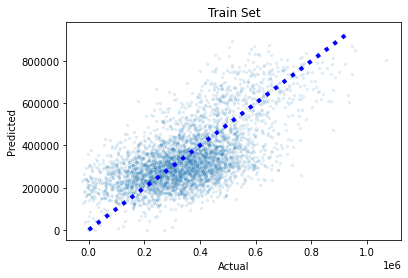

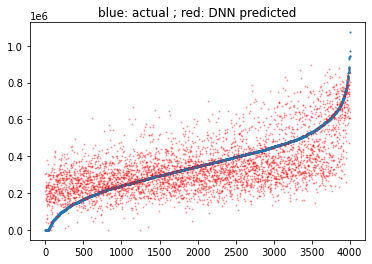

train actual and predicted corr =  0.63003
MAE =  106821.25502  ; MAE/Median =  0.30985
MdAE =  90918.90669  ; MdAE/Median =  0.26373

r_sqrd =  0.32


 ... 
range of test set :  0.0 1.0853539025820491
range of prediction :  0.0 0.92338705


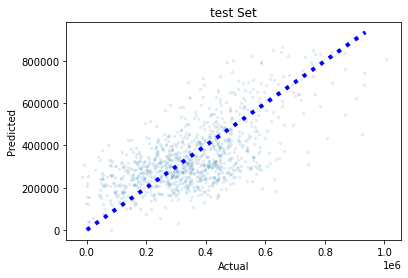

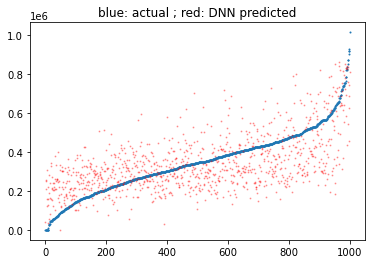

test actual and predicted corr =  0.62905
MAE =  109453.37475  ; MAE/Median =  0.31724
MdAE =  93432.03139  ; MdAE/Median =  0.2708

r_sqrd =  0.318


In [101]:
from sklearn.metrics import r2_score

print(history.history.keys())
print('min 1% validation loss(MSE) : ', np.percentile(history.history['val_loss'],1))

# "Loss"
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.axhline(np.percentile(history.history['val_loss'],1), color='grey', linestyle=':')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


print('range of train set : ', y_train.min(), y_train.max())

y_train_pred = model.predict(X_train)
y_train_pred = np.where(y_train_pred <0, 0, y_train_pred)
y_train_pred = np.where(y_train_pred >1, 1, y_train_pred)
print('range of prediction : ', y_train_pred.min(), y_train_pred.max())


#  check distribution of prediction -- train set

fig, ax = plt.subplots()
ax.scatter(rjitt(y_train*y_max), y_train_pred*y_max, alpha=0.1, s=5)
# ax.plot([y_train.min(), y_train.max()], [y_train_pred.min(), y_train_pred.max()], 'k:', lw=4)
max_range = y_max
ax.plot([y_train.min(), max_range], [y_train.min(), max_range], 'b:', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.title('Train Set')
plt.show()

dftmp_res = pd.DataFrame({'y_actual': y_train, 
              'y_pred': np.reshape(y_train_pred*y_max,len(y_train))})
dftmp_res = dftmp_res.sort_values('y_actual')

plt.scatter(range(1,len(y_train)+1), dftmp_res.y_actual*y_max, s=1)
plt.scatter(range(1,len(y_train)+1), dftmp_res.y_pred, s=1, color='red', alpha=0.3)
plt.title('blue: actual ; red: DNN predicted')
plt.show()

print('train actual and predicted corr = ' , round(np.corrcoef(y_train, np.reshape(y_train_pred,len(y_train)))[0][1],5 ))

val_MAE = abs(y_train - np.reshape(y_train_pred,len(y_train))).mean()
print('MAE = ', round(val_MAE*y_max,5), ' ; MAE/Median = ', round(val_MAE*y_max/np.median(y_train*y_max),5))
val_MdAE = np.median(abs(y_train - np.reshape(y_train_pred,len(y_train))))
print('MdAE = ', round(val_MdAE*y_max,5), ' ; MdAE/Median = ', round(val_MdAE*y_max/np.median(y_train*y_max),5))

print('\nr_sqrd = ', round(r2_score(y_train, np.reshape(y_train_pred,len(y_train))),3))

print('\n\n ... ')



#---------- CHECKing TEST SET result ---------------

print('range of test set : ', y_test.min(), y_test.max())

y_test_pred = model.predict(X_test)
y_test_pred = np.where(y_test_pred <0, 0, y_test_pred)
y_test_pred = np.where(y_test_pred >1, 1, y_test_pred)
print('range of prediction : ', y_test_pred.min(), y_test_pred.max())


#  check distribution of prediction -- test set

fig, ax = plt.subplots()
ax.scatter(rjitt(y_test*y_max), y_test_pred*y_max, alpha=0.1, s=5)
# ax.plot([y_test.min(), y_test.max()], [y_test_pred.min(), y_test_pred.max()], 'k:', lw=4)
max_range = y_max
ax.plot([y_test.min(), max_range], [y_test.min(), max_range], 'b:', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.title('test Set')
plt.show()

dftmp_res = pd.DataFrame({'y_actual': y_test*y_max, 
              'y_pred': np.reshape(y_test_pred*y_max,len(y_test))})
dftmp_res = dftmp_res.sort_values('y_actual')

plt.scatter(range(1,len(y_test)+1), dftmp_res.y_actual, s=1)
plt.scatter(range(1,len(y_test)+1), dftmp_res.y_pred, s=1, color='red', alpha=0.3)
plt.title('blue: actual ; red: DNN predicted')
plt.show()

print('test actual and predicted corr = ' , round(np.corrcoef(dftmp_res.y_actual, dftmp_res.y_pred)[0][1],5 ))

val_MAE = abs(y_test - np.reshape(y_test_pred,len(y_test))).mean()
print('MAE = ', round(val_MAE*y_max,5), ' ; MAE/Median = ', round(val_MAE*y_max/np.median(y_test*y_max),5))
val_MdAE = np.median(abs(y_test - np.reshape(y_test_pred,len(y_test))))
print('MdAE = ', round(val_MdAE*y_max,5), ' ; MdAE/Median = ', round(val_MdAE*y_max/np.median(y_test*y_max),5))

print('\nr_sqrd = ', round(r2_score(dftmp_res.y_actual, dftmp_res.y_pred),3))
# Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse)


In [40]:
# Model = [dropout, Test MAE, Test r_sqrd]
#---------------------
# Simple Net = [0, 100478 , 0.39 ]
# Wide Net  = [0.2, 102854, 0.389 ]
# Deep Net  = [0.2, 103558 , 0.377 ]

# LR = [-, 101823, 0.406]
# RF = [-, 104739, 0.374]

# Final Net = [0.2, 103669, 0.386] # without extreme value replacement


https://www.kaggle.com/xgdbigdata/keras-regression-tutorial  # 리그레션 튜토리얼 체크!!

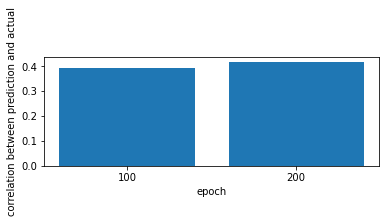

In [41]:
plt.figure(figsize=(6,2))
plt.bar(np.array([100,200]).astype(str), [0.39064,0.41615 ])
plt.xlabel('epoch')
plt.ylabel('correlation between prediction and actual')
plt.show()

### Run Other techniques to compare  - Exploratory Baseline Modeling

Intercept:   34797.66420619225
Coefficients:   [-2.20447512e+03 -2.10252955e-01  7.62643011e-02  1.90055964e+00
 -1.03552463e-01 -7.70500477e-01 -4.03527421e-02  5.75047105e-02
 -1.13653561e-01 -2.20717189e-01 -6.08207766e+02  1.38707479e+00
 -1.72975178e+02]
range of train set :  0 1072889
range of prediction :  75855.62243359689 742688.593123535


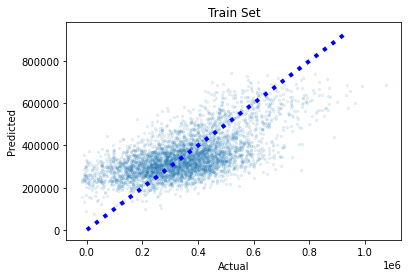

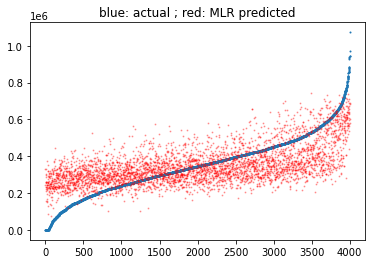

train actual and predicted corr =  0.63709
MAE =  100301.56677  ; MAE/Median =  0.29094
MdAE =  83967.4343  ; MdAE/Median =  0.24356

r_sqrd =  0.406


 ... 
range of test set :  0 1016167
range of prediction :  109174.82736962425 721749.6081204214


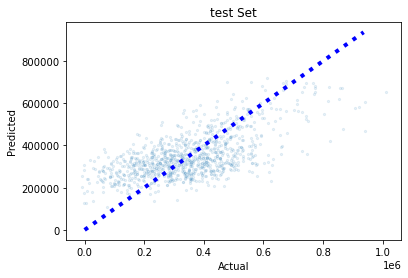

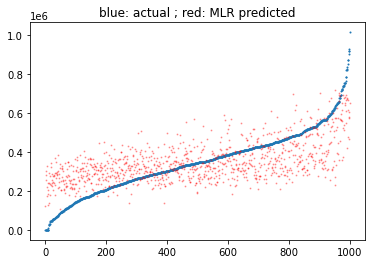

test actual and predicted corr =  0.63755
MAE =  101823.5262  ; MAE/Median =  0.29512
MdAE =  88480.94062  ; MdAE/Median =  0.25645

r_sqrd =  0.406


In [102]:
### Run Linear Regression as one of the baseline models 

from pandas import DataFrame
from sklearn import linear_model

X = dfm02[['age', 'amt_nike', 'amt_hnm', 'amt_strbk', 'amt_dgt', 'amt_book',
       'amt_htl', 'amt_prmmsneakers', 'amt_food', 'amt_beauty', 'cnt_pstyr',
       'amt_pstyr', 'cnt_login']] 
y = dfm02['amt_nxtyr']
 
    
# [Partitioning] Split the data up in train and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

print('Intercept:  ', regr.intercept_)
print('Coefficients:  ', regr.coef_)



from sklearn.metrics import r2_score

print('range of train set : ', y_train.min(), y_train.max())

y_train_pred = regr.predict(X_train)
print('range of prediction : ', y_train_pred.min(), y_train_pred.max())


#  check distribution of prediction -- train set

fig, ax = plt.subplots()
ax.scatter(rjitt(y_train), y_train_pred, alpha=0.1, s=5)
max_range = y_max
ax.plot([y_train.min(), max_range], [y_train.min(), max_range], 'b:', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.title('Train Set')
plt.show()



dftmp_res = pd.DataFrame({'y_actual': y_train, 
              'y_pred': np.reshape(y_train_pred,len(y_train))})
dftmp_res = dftmp_res.sort_values('y_actual')

plt.scatter(range(1,len(y_train)+1), dftmp_res.y_actual, s=1)
plt.scatter(range(1,len(y_train)+1), dftmp_res.y_pred, s=1, color='red', alpha=0.3)
plt.title('blue: actual ; red: MLR predicted')
plt.show()

print('train actual and predicted corr = ' , round(np.corrcoef(y_train, np.reshape(y_train_pred,len(y_train)))[0][1],5 ))

val_MAE = abs(y_train - np.reshape(y_train_pred,len(y_train))).mean()
print('MAE = ', round(val_MAE,5), ' ; MAE/Median = ', round(val_MAE/np.median(y_train),5))
val_MdAE = np.median(abs(y_train - np.reshape(y_train_pred,len(y_train))))
print('MdAE = ', round(val_MdAE,5), ' ; MdAE/Median = ', round(val_MdAE/np.median(y_train),5))

print('\nr_sqrd = ', round(r2_score(y_train, np.reshape(y_train_pred,len(y_train))),3))

print('\n\n ... ')


#----------
# CHECK TEST SET result

print('range of test set : ', y_test.min(), y_test.max())

y_test_pred = regr.predict(X_test)
print('range of prediction : ', y_test_pred.min(), y_test_pred.max())


#  check distribution of prediction -- test set

fig, ax = plt.subplots()
ax.scatter(rjitt(y_test), y_test_pred, alpha=0.1, s=5)
max_range = y_max
ax.plot([y_test.min(), max_range], [y_test.min(), max_range], 'b:', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.title('test Set')
plt.show()

dftmp_res = pd.DataFrame({'y_actual': y_test, 
              'y_pred': np.reshape(y_test_pred,len(y_test))})
dftmp_res = dftmp_res.sort_values('y_actual')

plt.scatter(range(1,len(y_test)+1), dftmp_res.y_actual, s=1)
plt.scatter(range(1,len(y_test)+1), dftmp_res.y_pred, s=1, color='red', alpha=0.3)
plt.title('blue: actual ; red: MLR predicted')
plt.show()

print('test actual and predicted corr = ' , round(np.corrcoef(dftmp_res.y_actual, dftmp_res.y_pred)[0][1],5 ))

val_MAE = abs(y_test - np.reshape(y_test_pred,len(y_test))).mean()
print('MAE = ', round(val_MAE,5), ' ; MAE/Median = ', round(val_MAE/np.median(y_test),5))
val_MdAE = np.median(abs(y_test - np.reshape(y_test_pred,len(y_test))))
print('MdAE = ', round(val_MdAE,5), ' ; MdAE/Median = ', round(val_MdAE/np.median(y_test),5))

print('\nr_sqrd = ', round(r2_score(dftmp_res.y_actual, dftmp_res.y_pred),3))
# Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse)




### Overfitting and Underfitting
the most common ways to prevent overfitting in neural networks:
* Get more training data.
* Reduce the capacity of the network.
* Add weight regularization.
* Add dropout.

### comparison : RF

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:   29.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


r-squared : 0.9138417287448583
range of train set :  0 1072889


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.0s finished


range of prediction :  35440.311 949856.778


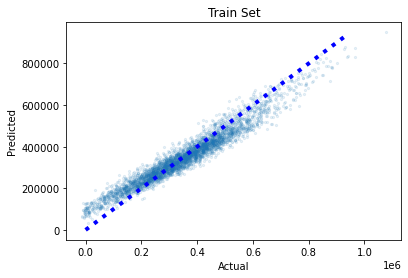

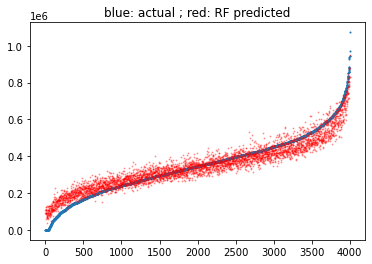

train actual and predicted corr =  0.96997
MAE =  37980.93039  ; MAE/Median =  0.11017
MdAE =  31708.99  ; MdAE/Median =  0.09198

r_sqrd =  0.914


 ... 
range of test set :  0 1016167


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.3s finished


range of prediction :  90036.749 795824.404


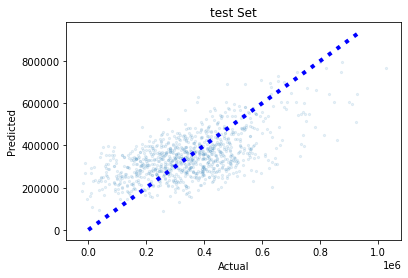

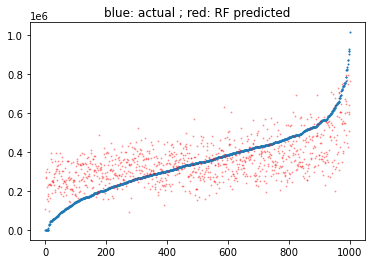

test actual and predicted corr =  0.61261
MAE =  104739.62443  ; MAE/Median =  0.30357
MdAE =  90219.492  ; MdAE/Median =  0.26149

r_sqrd =  0.374


In [103]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=1000, random_state=99,
                                  oob_score=True, verbose=1)
regressor.fit(X_train, y_train)
print('r-squared :', regressor.score(X_train, y_train, sample_weight=None))


from sklearn.metrics import r2_score

print('range of train set : ', y_train.min(), y_train.max())

y_train_pred = regressor.predict(X_train)
print('range of prediction : ', y_train_pred.min(), y_train_pred.max())


#  check distribution of prediction -- train set

fig, ax = plt.subplots()
ax.scatter(rjitt(y_train), y_train_pred, alpha=0.1, s=5)
max_range = y_max
ax.plot([y_train.min(), max_range], [y_train.min(), max_range], 'b:', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.title('Train Set')
plt.show()



dftmp_res = pd.DataFrame({'y_actual': y_train, 
              'y_pred': np.reshape(y_train_pred,len(y_train))})
dftmp_res = dftmp_res.sort_values('y_actual')

plt.scatter(range(1,len(y_train)+1), dftmp_res.y_actual, s=1)
plt.scatter(range(1,len(y_train)+1), dftmp_res.y_pred, s=1, color='red', alpha=0.3)
plt.title('blue: actual ; red: RF predicted')
plt.show()

print('train actual and predicted corr = ' , round(np.corrcoef(y_train, np.reshape(y_train_pred,len(y_train)))[0][1],5 ))

val_MAE = abs(y_train - np.reshape(y_train_pred,len(y_train))).mean()
print('MAE = ', round(val_MAE,5), ' ; MAE/Median = ', round(val_MAE/np.median(y_train),5))
val_MdAE = np.median(abs(y_train - np.reshape(y_train_pred,len(y_train))))
print('MdAE = ', round(val_MdAE,5), ' ; MdAE/Median = ', round(val_MdAE/np.median(y_train),5))

print('\nr_sqrd = ', round(r2_score(y_train, np.reshape(y_train_pred,len(y_train))),3))

print('\n\n ... ')


#----------
# CHECK TEST SET result

print('range of test set : ', y_test.min(), y_test.max())

y_test_pred = regressor.predict(X_test)
print('range of prediction : ', y_test_pred.min(), y_test_pred.max())


#  check distribution of prediction -- test set

fig, ax = plt.subplots()
ax.scatter(rjitt(y_test), y_test_pred, alpha=0.1, s=5)
max_range = y_max
ax.plot([y_test.min(), max_range], [y_test.min(), max_range], 'b:', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.title('test Set')
plt.show()

dftmp_res = pd.DataFrame({'y_actual': y_test, 
              'y_pred': np.reshape(y_test_pred,len(y_test))})
dftmp_res = dftmp_res.sort_values('y_actual')

plt.scatter(range(1,len(y_test)+1), dftmp_res.y_actual, s=1)
plt.scatter(range(1,len(y_test)+1), dftmp_res.y_pred, s=1, color='red', alpha=0.3)
plt.title('blue: actual ; red: RF predicted')
plt.show()

print('test actual and predicted corr = ' , round(np.corrcoef(dftmp_res.y_actual, dftmp_res.y_pred)[0][1],5 ))

val_MAE = abs(y_test - np.reshape(y_test_pred,len(y_test))).mean()
print('MAE = ', round(val_MAE,5), ' ; MAE/Median = ', round(val_MAE/np.median(y_test),5))
val_MdAE = np.median(abs(y_test - np.reshape(y_test_pred,len(y_test))))
print('MdAE = ', round(val_MdAE,5), ' ; MdAE/Median = ', round(val_MdAE/np.median(y_test),5))

print('\nr_sqrd = ', round(r2_score(dftmp_res.y_actual, dftmp_res.y_pred),3))
# Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse)



### MULTIPLE target variable case (i.e. y1 and y2)
- 하나의 모델이 한 번에 여러 타겟 변수를 예측하는 모델

In [44]:
# Import `train_test_split` from `sklearn.model_selection`
from sklearn.model_selection import train_test_split

# Specify the data 
X=dfm02.iloc[:,1:14]
print(dfm02.iloc[:,1:14].head())

# Specify the target 
y1 = np.ravel(dfm02.cnt_nxtyr) # 1차원 array로 변경 np.ravel
y2 = np.ravel(dfm02.amt_nxtyr)


# Split the data up in train and test sets
X_train, X_test, y1_train, y1_test, y2_train, y2_test = train_test_split(X, y1, y2, test_size=0.33, random_state=12)

# scaling
# adjust possibly extreme values included
y1_max = np.percentile(y1_train, 99)
y1_train = np.where(y1_train>y1_max, y1_max, y1_train)
y1_train = y1_train/y1_max


y2_max = np.percentile(y2_train, 99)
y2_train = np.where(y2_train>y2_max, y2_max, y2_train)
y2_train = y2_train/y2_max

y1_test = y1_test/y1_max
y2_test = y2_test/y2_max

y_train = np.transpose(np.array([y1_train, y2_train]))
print(X_train.shape, y_train.shape)

   age  amt_nike  amt_hnm  amt_strbk  amt_dgt  amt_book  amt_htl  \
0   27     25100        0      20000        0         0        0   
1   28     21500        0      21700        0         0        0   
2   27         0        0      20200        0         0        0   
3   27         0        0          0        0         0        0   
4   27     20100        0      34000        0         0        0   

   amt_prmmsneakers      amt_food  amt_beauty  cnt_pstyr  amt_pstyr  cnt_login  
0                 0    182.744231       24400          4   209321.0         15  
1                 0  43507.134000       23500          3   188514.0         17  
2                 0    194.922917       25200          2   206183.0         16  
3                 0    121.457143       27000          2   226851.0         10  
4             76700    267.888462       24600          4   221491.0         22  
(3350, 13) (3350, 2)


In [45]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)


In [46]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model2 = Sequential()

# Add an input layer 
model2.add(Dense(13, activation='relu', input_shape=(13,)))


nlayer = 4
nnode = 256

for _ in range(nlayer):
    # Add hidden layer   
    model2.add(Dense(nnode,  activation='relu' ))
    model2.add(Dropout(0.25))
    nnode = int(nnode/2)


# Add an output layer 
model2.add(Dense(2, activation='linear'))

In [47]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
import datetime

early_stopping = EarlyStopping(patience=30, monitor='val_loss')
optimizer = tf.keras.optimizers.Adam(0.0001)

model2.compile(loss='mae',
              optimizer= optimizer,
              metrics=['mae'])

start_time = datetime.datetime.now()
print('strart : ', start_time )

history = model2.fit(X_train, y_train, epochs=500, batch_size=16, 
                     verbose=1, validation_split=0.2,
                     callbacks=[early_stopping])

end_time = datetime.datetime.now()
print('end : ', end_time )
print('runtime : ', end_time - start_time)

strart :  2020-11-12 14:31:06.710346
Epoch 1/500
168/168 [==============================] - 0s 3ms/step - loss: 0.2699 - mae: 0.2699 - val_loss: 0.1664 - val_mae: 0.1664
Epoch 2/500
168/168 [==============================] - 0s 2ms/step - loss: 0.2061 - mae: 0.2061 - val_loss: 0.1529 - val_mae: 0.1529
Epoch 3/500
168/168 [==============================] - 0s 2ms/step - loss: 0.1932 - mae: 0.1932 - val_loss: 0.1485 - val_mae: 0.1485
Epoch 4/500
168/168 [==============================] - 0s 2ms/step - loss: 0.1807 - mae: 0.1807 - val_loss: 0.1425 - val_mae: 0.1425
Epoch 5/500
168/168 [==============================] - 0s 2ms/step - loss: 0.1744 - mae: 0.1744 - val_loss: 0.1494 - val_mae: 0.1494
Epoch 6/500
168/168 [==============================] - 0s 2ms/step - loss: 0.1664 - mae: 0.1664 - val_loss: 0.1376 - val_mae: 0.1376
Epoch 7/500
168/168 [==============================] - 0s 2ms/step - loss: 0.1639 - mae: 0.1639 - val_loss: 0.1354 - val_mae: 0.1354
Epoch 8/500
168/168 [===========

Epoch 62/500
168/168 [==============================] - 0s 2ms/step - loss: 0.1287 - mae: 0.1287 - val_loss: 0.1228 - val_mae: 0.1228
Epoch 63/500
168/168 [==============================] - 0s 2ms/step - loss: 0.1279 - mae: 0.1279 - val_loss: 0.1219 - val_mae: 0.1219
Epoch 64/500
168/168 [==============================] - 0s 2ms/step - loss: 0.1290 - mae: 0.1290 - val_loss: 0.1218 - val_mae: 0.1218
Epoch 65/500
168/168 [==============================] - 0s 2ms/step - loss: 0.1276 - mae: 0.1276 - val_loss: 0.1222 - val_mae: 0.1222
Epoch 66/500
168/168 [==============================] - 0s 2ms/step - loss: 0.1284 - mae: 0.1284 - val_loss: 0.1226 - val_mae: 0.1226
Epoch 67/500
168/168 [==============================] - 0s 2ms/step - loss: 0.1283 - mae: 0.1283 - val_loss: 0.1220 - val_mae: 0.1220
Epoch 68/500
168/168 [==============================] - 0s 2ms/step - loss: 0.1274 - mae: 0.1274 - val_loss: 0.1223 - val_mae: 0.1223
Epoch 69/500
168/168 [==============================] - 0s 2ms

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_38 (Dense)             (None, 256)               3584      
_________________________________________________________________
dropout_21 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_22 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_23 (Dropout)         (None, 64)               

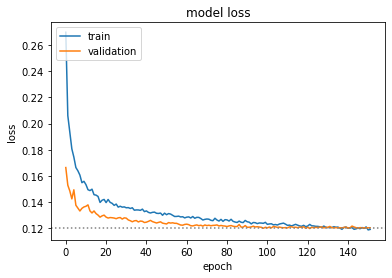

[[0.2917272  0.32691333]
 [0.39728135 0.41561976]
 [0.41628215 0.41647232]
 ...
 [0.37294027 0.39751   ]
 [0.39617693 0.41500336]
 [0.3647975  0.29466966]]


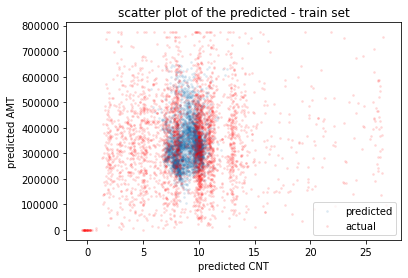

In [48]:
print(model2.summary())

# "Loss"
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.axhline(np.percentile(history.history['val_loss'],1), color='grey', linestyle=':')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



y_train_pred = model2.predict(X_train)

print(y_train_pred)

plt.scatter(y_train_pred[:,0]*y1_max, y_train_pred[:,1]*y2_max, alpha=0.1, s=3)
plt.scatter(rjitt(y1_train)*y1_max, y2_train*y2_max, alpha=0.1, s=3, color='red')
plt.title('scatter plot of the predicted - train set')
plt.xlabel('predicted CNT')
plt.ylabel('predicted AMT')
plt.legend(['predicted','actual'])
plt.show()

corr =  0.22456


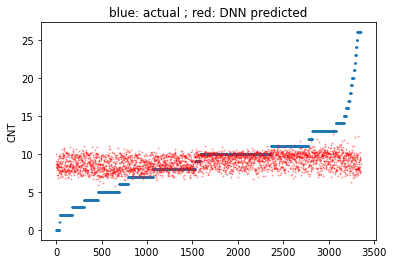

corr =  0.67699


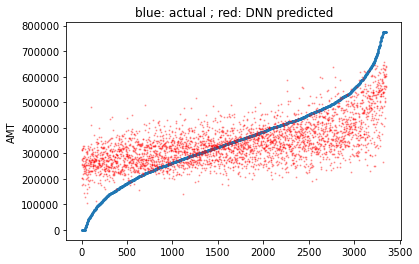

In [49]:
dftmp_res = pd.DataFrame({'y1_actual': y1_train*y1_max, 
                          'y2_actual': y2_train*y2_max, 
                          'y1_pred': np.reshape(y_train_pred[:,0],len(y_train_pred))*y1_max,
                          'y2_pred': np.reshape(y_train_pred[:,1],len(y_train_pred))*y2_max})

# 건수 금액 모두 음수값은 가질 수 없다는 전제 적용
dftmp_res['y1_pred'] = np.where(dftmp_res['y1_pred']<0,0, dftmp_res['y1_pred'])
dftmp_res['y2_pred'] = np.where(dftmp_res['y2_pred']<0,0, dftmp_res['y2_pred'])

dftmp_res1 = dftmp_res[['y1_actual','y1_pred']].sort_values('y1_actual')
print('corr = ' , round(np.corrcoef(dftmp_res1.y1_actual, dftmp_res1.y1_pred)[0][1],5 ))

plt.scatter(range(1,len(y_train)+1), dftmp_res1.y1_actual, s=1)
plt.scatter(range(1,len(y_train)+1), dftmp_res1.y1_pred, s=1, color='red', alpha=0.3)
plt.title('blue: actual ; red: DNN predicted')
plt.ylabel('CNT')
plt.show()


dftmp_res1 = dftmp_res[['y2_actual','y2_pred']].sort_values('y2_actual')
print('corr = ' , round(np.corrcoef(dftmp_res1.y2_actual, dftmp_res1.y2_pred)[0][1],5 ))

plt.scatter(range(1,len(y_train)+1), dftmp_res1.y2_actual, s=1)
plt.scatter(range(1,len(y_train)+1), dftmp_res1.y2_pred, s=1, color='red', alpha=0.3)
plt.title('blue: actual ; red: DNN predicted')
plt.ylabel('AMT')
plt.show()


corr =  0.09878


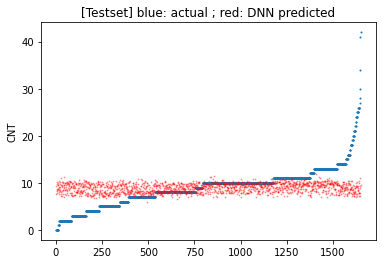

corr =  0.56534


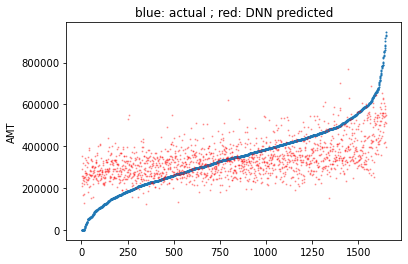

MAE =  2.911975124532526 106007.7459280303

r_sqrd =  -0.006 0.315


In [50]:
y_test_pred = model2.predict(X_test)

dftmp_res = pd.DataFrame({'y1_actual': y1_test*y1_max, 
                          'y2_actual': y2_test*y2_max, 
                          'y1_pred': np.reshape(y_test_pred[:,0],len(y_test_pred))*y1_max,
                          'y2_pred': np.reshape(y_test_pred[:,1],len(y_test_pred))*y2_max})

# 건수 금액 모두 음수값은 가질 수 없다는 전제 적용
dftmp_res['y1_pred'] = np.where(dftmp_res['y1_pred']<0,0, dftmp_res['y1_pred'])
dftmp_res['y2_pred'] = np.where(dftmp_res['y2_pred']<0,0, dftmp_res['y2_pred'])

dftmp_res1 = dftmp_res[['y1_actual','y1_pred']].sort_values('y1_actual')

print('corr = ' , round(np.corrcoef(dftmp_res1.y1_actual, dftmp_res1.y1_pred)[0][1],5 ))

x_vals = np.array(range(1,len(y1_test)+1))
plt.scatter(x_vals , dftmp_res1.y1_actual, s=1)
plt.scatter(x_vals , rjitt(dftmp_res1.y1_pred), s=1, color='red', alpha=0.3)
plt.title('[Testset] blue: actual ; red: DNN predicted')
plt.ylabel('CNT')
plt.show()


dftmp_res1 = dftmp_res[['y2_actual','y2_pred']].sort_values('y2_actual')
print('corr = ' , round(np.corrcoef(dftmp_res1.y2_actual, dftmp_res1.y2_pred)[0][1],5 ))

x_vals = np.array(range(1,len(y2_test)+1))
plt.scatter(x_vals , dftmp_res1.y2_actual, s=1)
plt.scatter(x_vals , rjitt(dftmp_res1.y2_pred), s=1, color='red', alpha=0.3)
plt.title('blue: actual ; red: DNN predicted')
plt.ylabel('AMT')
plt.show()

print('MAE = ', abs(dftmp_res.y1_actual - dftmp_res.y1_pred).mean(), abs(dftmp_res.y2_actual - dftmp_res.y2_pred).mean())

from sklearn.metrics import r2_score

print('\nr_sqrd = ', round(r2_score(dftmp_res.y1_actual, dftmp_res.y1_pred),3),
     round(r2_score(dftmp_res.y2_actual, dftmp_res.y2_pred),3))

In [51]:
# [Discussion]
# 다음해 금액보다 건수는 잘 예측하지 못한다면 이유는?
# corr 0.12 정도의 예측도 가치가 있을까?

dfm02[dfm02.columns[1:]].corr()['cnt_nxtyr'].sort_values()

amt_book           -0.024122
age                -0.015177
amt_food           -0.003918
amt_dgt             0.009965
cnt_login           0.012514
amt_prmmsneakers    0.014520
amt_htl             0.016270
amt_pstyr           0.025898
amt_beauty          0.041550
amt_hnm             0.042222
amt_nike            0.054561
cnt_pstyr           0.072998
amt_nxtyr           0.087671
amt_strbk           0.098201
cnt_nxtyr           1.000000
Name: cnt_nxtyr, dtype: float64

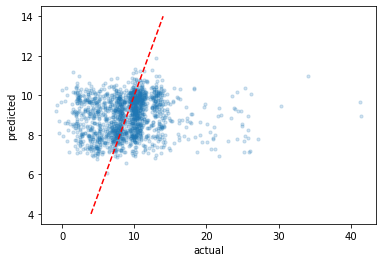

In [52]:
plt.scatter(rjitt(dftmp_res.y1_actual), rjitt(dftmp_res.y1_pred),
           alpha=0.2, s=10)
plt.plot([4,14],[4,14], color='red', linestyle='--')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

# CNN Convolutional NN

- CNN example ::  https://adventuresinmachinelearning.com/keras-tutorial-cnn-11-lines/ 

### to prepare retail (REI) data for CNN

In [53]:
#--------------

df001 = pd.read_csv('C:/YONG/r_Y_B/GAMDFM/REI_retail/tb_tr01.csv')
# convert sas date to pandas date
df001['tr_date'] = (pd.to_timedelta(df001.d_date, unit='S') + pd.Timestamp('1960-1-1')).astype(str).str.slice(0, 9)
df002 = df001[['customer_id','sk_transaction_id', 'sk_item_id', 't_item_amt_sale','t_item_qty_sale', 'tr_date']]
df002 = df002[df002.customer_id>1000] 


print(df002.tr_date.min(), df002.tr_date.max())
df002.sort_values('tr_date').head()


2002-01-0 2003-12-3


,customer_id,sk_transaction_id,sk_item_id,t_item_amt_sale,t_item_qty_sale,tr_date
162260,4928473,41876257.0,72742.0,1.35,1.0,2002-01-0
173691,5272402,42024602.0,36516.0,11.95,1.0,2002-01-0
173690,5272402,42024602.0,37462.0,75.00,1.0,2002-01-0
146676,4460011,42236806.0,42140.0,8.95,1.0,2002-01-0
23627,806142,42003842.0,34042.0,20.00,1.0,2002-01-0


In [54]:
# df002.sort_values('tr_date').tail()

In [55]:
df003 = pd.read_csv('C:/YONG/r_Y_B/GAMDFM/REI_retail/sku_mast01.csv')
df003.head()
df004 = df003[['sk_item_id', 'department_name']]
df004['department_name'].drop_duplicates().head()

0    Dividend Adjustment
1      Tender Adjustment
2      Header Adjustment
3                UNKNOWN
4             FIELD GEAR
Name: department_name, dtype: object

In [56]:
df002['tr_amt_sale'] = df002.t_item_amt_sale * df002.t_item_qty_sale
df005 = df002[['customer_id','sk_transaction_id', 'sk_item_id', 'tr_date', 'tr_amt_sale']]
df006 = df005.merge(df004, on='sk_item_id', how='left' )
df006.department_name.fillna('others', inplace=True)
df006['tr_mnth'] = df006.tr_date.str.slice(0, 7)
df006 = df006[['customer_id','tr_mnth', 'tr_amt_sale', 'department_name']]
df007 = df006.groupby(['customer_id','tr_mnth','department_name']).sum().reset_index()
df007.sort_values(['customer_id','tr_mnth']).head(20)

,customer_id,tr_mnth,department_name,tr_amt_sale
0,1114,2003-05,WOMEN'S FOOTWEAR,59.99
1,1114,2003-05,others,131.86
2,2900,2002-12,TRAVEL,48.00
3,2900,2002-12,others,112.00
4,2900,2003-01,CAMPING GEAR,69.90
5,2900,2003-01,others,4.50
6,3224,2002-08,WOMENSWEAR,32.99
7,3224,2002-08,others,82.82
8,3224,2003-01,others,112.00
9,3224,2003-11,GIFTS/GAMES/GADGETS,13.00


In [57]:
df008 = df007[df007.tr_mnth.str.slice(0,4)=='2002']
df008.head()

,customer_id,tr_mnth,department_name,tr_amt_sale
2,2900,2002-12,TRAVEL,48.00
3,2900,2002-12,others,112.00
6,3224,2002-08,WOMENSWEAR,32.99
7,3224,2002-08,others,82.82
10,4860,2002-01,MEN'S FOOTWEAR,15.00


In [58]:
df0081 = df008[['customer_id','department_name']].drop_duplicates().groupby('department_name').count().reset_index()
df0081 = df0081.sort_values('customer_id', ascending=False)
df0081['dept_size_rnk'] = range(0,(df0081.shape[0]))
df0081['department_name'] = np.where(df0081['dept_size_rnk'] >11, 'others',df0081.department_name)
df0081['dept_size_rnk'] = np.where(df0081['dept_size_rnk'] >11, 0,df0081.dept_size_rnk)
df0081['dept_size_rnk'] = np.where(df0081['dept_size_rnk'] ==0, 12,df0081.dept_size_rnk)

df0081 = df0081.groupby(['department_name','dept_size_rnk']).sum().reset_index()
df0081 = df0081.sort_values('dept_size_rnk')

df0081

,department_name,dept_size_rnk,customer_id
2,CAMPING GEAR,1,4547
5,FOOD,2,2256
9,SOCKS,3,2158
8,SLEEPING BAGS,4,1516
6,MEN'S FOOTWEAR,5,1287
0,BASIC CLOTHING,6,1266
1,BIKE ACCESSORIES,7,1174
3,CLIMBING,8,1163
4,FIELD GEAR,9,1068
7,OXT/PERFORMANCEWEAR,10,890


In [59]:
df0082 = df008.merge(df0081[['department_name','dept_size_rnk']])
df0082['mnth_id'] = df0082.tr_mnth.str.slice(5,7).astype(int)

# df0082['amt'] = np.where(df0082.tr_amt_sale>0,1,0)
df0082['amt'] = np.where(df0082.tr_amt_sale<0,0,df0082.tr_amt_sale)
df0082['amt'] = np.where(df0082.amt>50,50,df0082.amt)
df0082['amt'] = df0082.amt/df0082.amt.max()
print(df0082['amt'].median())
print(df0082.shape)
df0082.sort_values(['customer_id','tr_mnth','dept_size_rnk']).head()
# df0082.to_pickle(dataPath + 'df0082.pkl')

# df0083 = []

0.67
(43573, 7)


,customer_id,tr_mnth,department_name,tr_amt_sale,dept_size_rnk,mnth_id,amt
0,2900,2002-12,TRAVEL,48.00,11,12,0.96
980,2900,2002-12,others,112.00,12,12,1.00
981,3224,2002-08,others,82.82,12,8,1.00
21077,4860,2002-01,MEN'S FOOTWEAR,15.00,5,1,0.30
982,4860,2002-01,others,323.82,12,1,1.00


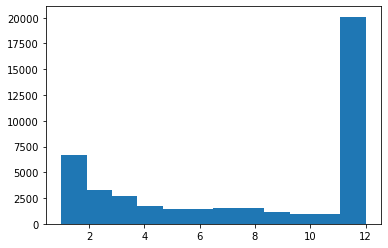

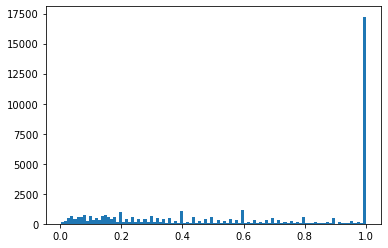

In [60]:
plt.hist(df0082.dept_size_rnk, bins=12)
plt.show()

plt.hist(df0082.amt, bins=100)
plt.show()

In [61]:
cust_list =df0082.customer_id.unique()
np.array(np.random.shuffle(cust_list))
cust_list[:10]

# shape should be in ... 
# print(train_images.shape) # (10000, 12, 12, 1)

array([1249564,  145223, 4307456, 2847059,  586321, 3949677, 2853471,
        184593, 3480450, 4501793], dtype=int64)

In [62]:
# create empty combination frame
from itertools import product

dfpkt = pd.DataFrame(data=list(product(df0082.dept_size_rnk.unique(), df0082.mnth_id.unique())), columns=['dept_size_rnk', 'mnth_id'])
# print(dfpkt.sort_values(['mnth_id', 'dept_size_rnk']).tail(10))
# print(dfpkt.shape, 12*12)

empty_arr =  np.zeros(shape=[1,12,12])
# print(empty_arr)

smpl_size = 8000

for x in cust_list[:smpl_size]:
    dftmp01 = df0082[df0082.customer_id==x][['mnth_id', 'dept_size_rnk','amt']]
    dftmp02 = dfpkt.merge(dftmp01, on=['mnth_id', 'dept_size_rnk'], how='left')
    dftmp02.fillna(0, inplace=True)
    # print(dftmp02.head(20))
    dftmp02 = dftmp02.pivot(values='amt', index='dept_size_rnk', columns='mnth_id').reset_index()
    dftmp02.fillna(0, inplace=True)
    atmp1 = np.array(dftmp02.iloc[:,1:]).reshape(1,12,12)
    # print(atmp1)
    empty_arr = np.concatenate((empty_arr, atmp1), axis=0)
    # print(empty_arr)
    if x in cust_list[[1000, 2000, 3000]]:
        print(x)

train_arr = empty_arr        
print(train_arr.shape)

# prepare test set
empty_arr =  np.zeros(shape=[1,12,12])
# print(empty_arr)

print('\n....... preparing test set\n')
smpl_size = smpl_size

for x in cust_list[smpl_size:]:
    dftmp01 = df0082[df0082.customer_id==x][['mnth_id', 'dept_size_rnk','amt']]
    dftmp02 = dfpkt.merge(dftmp01, on=['mnth_id', 'dept_size_rnk'], how='left')
    dftmp02.fillna(0, inplace=True)
    dftmp02 = dftmp02.pivot(values='amt', index='dept_size_rnk', columns='mnth_id').reset_index()
    dftmp02.fillna(0, inplace=True)
    atmp1 = np.array(dftmp02.iloc[:,1:]).reshape(1,12,12)
    # print(atmp1)
    empty_arr = np.concatenate((empty_arr, atmp1), axis=0)
    # print(empty_arr)
    if x in cust_list[[1000, 2000, 3000]]:
        print(x)

test_arr = empty_arr        
print(test_arr.shape)


8893007
1584403
69401
(8001, 12, 12)

....... preparing test set

(2777, 12, 12)


In [63]:
train_arr = np.expand_dims(train_arr, axis=3)
print(train_arr.shape)
# print(train_arr[:5])

test_arr = np.expand_dims(test_arr, axis=3)
print(test_arr.shape)
# print(test_arr[:5])

(8001, 12, 12, 1)
(2777, 12, 12, 1)


In [64]:
# check :: https://victorzhou.com/blog/keras-cnn-tutorial/ 

,customer_id,tr_amt_sale_nxtyr,remain
0,1114,191.85,1
1,2900,74.40,1
2,3224,125.00,1
3,4860,1326.27,1
4,5313,889.35,1


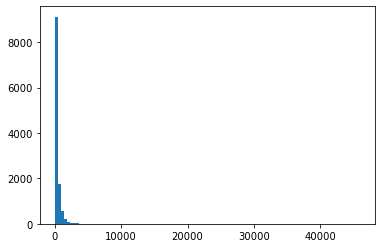

In [65]:
df009 =  df007[df007.tr_mnth.str.slice(0,4)=='2003']
df010 = df009[['customer_id','tr_amt_sale']].groupby('customer_id').sum().reset_index()
df010.columns = ['customer_id', 'tr_amt_sale_nxtyr']
df010['remain'] = 1
plt.hist(df010.tr_amt_sale_nxtyr, bins=100)
df010.head()

(15234, 2)


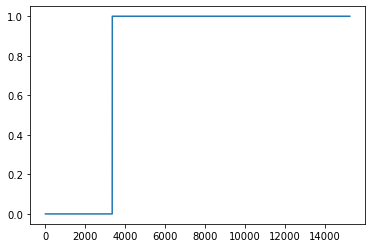

proportion of remaining custs :  0.7805566495995799


,customer_id,remain
0,1114,1.0
1,2900,1.0
2,3224,1.0
3,4860,1.0
4,5313,1.0


In [66]:
df011 = df007[['customer_id']].drop_duplicates().merge(df010[['customer_id','remain']], on='customer_id', how='left' )
df011.remain.fillna(0, inplace=True)
print(df011.shape)
plt.plot(np.sort(df011.remain))
plt.show()
# df011.to_pickle(dataPath + 'df011.pkl')
print('proportion of remaining custs : ', df011.remain.mean())
df011.head()

In [67]:
train_labels = np.array([0])
print(train_labels.shape)

for x in cust_list[:smpl_size]:
    remain_x = df011[df011.customer_id == x]['remain'].values[0]
    train_labels = np.append(train_labels, remain_x)
print(train_labels)
print(train_labels.shape)

test_labels = np.array([0])
print(test_labels.shape)

for x in cust_list[smpl_size:]:
    remain_x = df011[df011.customer_id == x]['remain'].values[0]
    test_labels = np.append(test_labels, remain_x)
print(test_labels)
print(test_labels.shape)

(1,)
[0. 1. 1. ... 1. 0. 1.]
(8001,)
(1,)
[0. 0. 1. ... 0. 1. 1.]
(2777,)


In [71]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, LeakyReLU, BatchNormalization
from keras_radam import RAdam
from keras import regularizers
from keras.regularizers import l2

# to adjust learning rate
from keras import optimizers 
optimizer = optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)


model = Sequential()
dropout_Rate =0.2 

model = Sequential()
model.add(Conv2D(32, (3,3), padding="same", input_shape=(12, 12, 1), activation='relu'))              
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(dropout_Rate))
print(model.output_shape)

model.add(Conv2D(64, kernel_size=(3,3), padding="same", activation='relu', 
                 kernel_regularizer=regularizers.l2(0.0005)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(dropout_Rate))
model.add(Conv2D(128, kernel_size=(3,3), padding="same", activation='relu', 
                 strides=(2,2), kernel_regularizer=regularizers.l2(0.0005)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(dropout_Rate))
print(model.output_shape)

model.add(Flatten())

# model.add(Dense(1024, activation='relu'))
model.add(Dense(1024,activation=LeakyReLU(alpha=0.3)))
model.add(BatchNormalization())
model.add(Dropout(dropout_Rate))
print(model.output_shape)

# model.add(Dense(256, kernel_initializer='normal', activation='relu'))
model.add(Dense(256, kernel_initializer='normal', activation=LeakyReLU(alpha=0.3)))
model.add(Dropout(dropout_Rate))
print(model.output_shape)

# output layer
model.add(Dense(1, activation='sigmoid')) 
# activation = sigmoid for binary numeric target ; softmax for multicategory



model.compile(
  optimizer= optimizer,  
  loss='binary_crossentropy',  # 'categorical_crossentropy' when str type target
  metrics=['MAE'],
)

from keras.utils import to_categorical

history = model.fit(
  train_arr,
  # to_categorical(train_labels), # for multiclass case
  train_labels,  
  epochs=120, # [30, 60, 120]
  batch_size=32,
  shuffle=True,
  verbose=1, validation_split=0.1)

(None, 6, 6, 32)
(None, 1, 1, 128)
(None, 1024)
(None, 256)
Epoch 1/120
225/225 [==============================] - 4s 19ms/step - loss: 0.8241 - MAE: 0.4115 - val_loss: 0.6537 - val_MAE: 0.4183
Epoch 2/120
225/225 [==============================] - 4s 18ms/step - loss: 0.7436 - MAE: 0.3774 - val_loss: 0.6714 - val_MAE: 0.4462
Epoch 3/120
225/225 [==============================] - 4s 20ms/step - loss: 0.7162 - MAE: 0.3728 - val_loss: 0.5996 - val_MAE: 0.3737
Epoch 4/120
225/225 [==============================] - 4s 18ms/step - loss: 0.7222 - MAE: 0.3791 - val_loss: 0.5922 - val_MAE: 0.3609
Epoch 5/120
225/225 [==============================] - 5s 21ms/step - loss: 0.7105 - MAE: 0.3766 - val_loss: 0.5977 - val_MAE: 0.3568
Epoch 6/120
225/225 [==============================] - 5s 21ms/step - loss: 0.6957 - MAE: 0.3713 - val_loss: 0.5973 - val_MAE: 0.3639
Epoch 7/120
225/225 [==============================] - 5s 22ms/step - loss: 0.6786 - MAE: 0.3722 - val_loss: 0.5971 - val_MAE: 0.3688
Ep

In [ ]:
## Keras Conv2D and Convolutional Layers :: 
## 128X128 미만에서는 (3,3) 이 기본
## 보통은 strides = (1,1) default 사용
## pooling 대신 strides를 키우는 것이 유용한 경우도 존재

## https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/ 

dict_keys(['loss', 'MAE', 'val_loss', 'val_MAE'])
min 1% validation loss :  0.5785106867551804


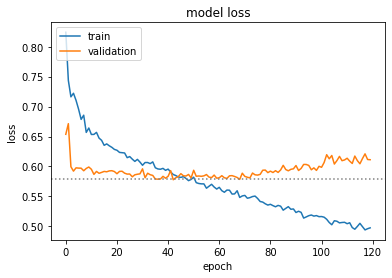

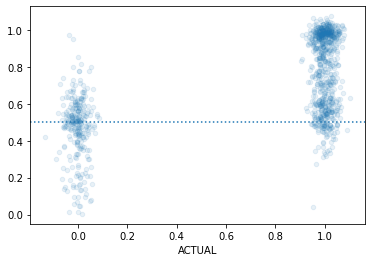

accuracy%  79.9
corr =  0.604810796667339

----------
[ USING TEST SET ]

(2777, 12, 12, 1) 3000
[0.4443721  0.9859618  0.99928343 0.5198293  0.99922776 0.9990439
 0.9940405  0.7460554  0.99938035 0.5484509  0.9369025  0.45476514
 0.46223935 0.480863   0.49769995 0.99969363 0.446185   0.480863
 0.5608444  0.64166415 0.9999723  0.6920012  0.26629144 0.7667711
 0.99696994 0.574757   0.22541982 0.50490314 0.9999496  0.653242  ] 0.06821096 ~ 1.0


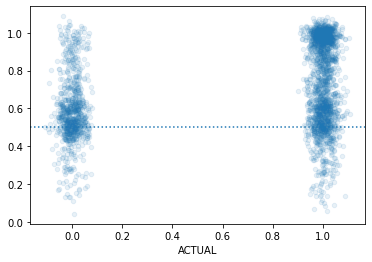

accuracy%  67.66294562477493


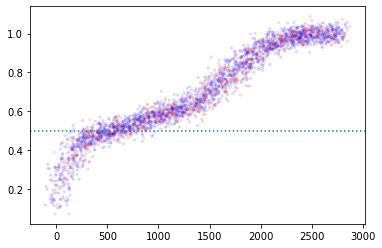

corr =  0.32132670134009483
[[ 282  576]
 [ 322 1597]]


In [72]:
print(history.history.keys())
print('min 1% validation loss : ', np.percentile(history.history['val_loss'],1))

# "Loss"
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.axhline(np.percentile(history.history['val_loss'],1), color='grey', linestyle=':')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

n_predict = 1000

predictions = model.predict(train_arr[:n_predict])
# predicted = np.argmax(predictions, axis=1)
actual = train_labels[:n_predict].astype(int)
# print(predicted, actual)

# plt.scatter(rjitt2(actual ), rjitt2(predicted ), s=20, alpha=0.1)
# plt.xlabel('ACTUAL')
# plt.show()

plt.scatter(rjitt2(actual), rjitt2(predictions[:,0] ), s=20, alpha=0.1)
plt.xlabel('ACTUAL')
plt.axhline(0.5, linestyle=':')
plt.show()


df_predeval = pd.DataFrame({'actl': actual,
              'pred':predictions[:,0]})
df_predeval['predc'] = np.where(df_predeval.pred>0.5, 1, 0)
print('accuracy% ', df_predeval[df_predeval.predc==df_predeval.actl].shape[0] / df_predeval.shape[0] *100)

# getting correlation coefficient
print('corr = ', df_predeval.pred.corr(df_predeval.actl))


#--- using test set --------
# 
#
print('\n----------\n[ USING TEST SET ]\n')

n_predict1 = n_predict *3

print(test_arr.shape, n_predict1)


predictions = model.predict(test_arr[:n_predict1])[:,0]
print(predictions[:30], predictions.min(), '~', predictions.max())
# predictions = (model.predict(test_arr[:n_predict1]) -0.5) *2
# predicted = np.argmax(predictions, axis=1)
actual = test_labels[:n_predict1].astype(int)

# plt.scatter(rjitt2(actual ), rjitt2(predicted ), s=20, alpha=0.1)
# plt.xlabel('ACTUAL')
# plt.show()

plt.scatter(rjitt2(actual), rjitt2(predictions), s=20, alpha=0.1)
plt.xlabel('ACTUAL')
plt.axhline(0.5, linestyle=':')
plt.show()

df_predeval = pd.DataFrame({'actl': actual,
              'pred':predictions})
df_predeval['predc'] = np.where(df_predeval.pred>0.5, 1, 0)
print('accuracy% ', df_predeval[df_predeval.predc==df_predeval.actl].shape[0] / df_predeval.shape[0] *100)

df_predevals = df_predeval.sort_values('pred')

xindx = range(1,len(df_predevals.pred)+1)
tmpindc = abs(df_predeval.pred - df_predeval.actl)
colors1 = ['red' if x >0.5 else 'blue' for x in tmpindc]
plt.scatter(rjitt2(xindx), rjitt2(df_predevals.pred),
            s=5, alpha=0.1,
           color = colors1)
plt.axhline(0.5, linestyle=':')
plt.show()

# getting correlation coefficient
print('corr = ', df_predeval.pred.corr(df_predeval.actl))


from sklearn.metrics import confusion_matrix

# confusion matrix
cm = confusion_matrix(df_predeval.actl, df_predeval.predc)
print(cm)